# 1.0 Importação de Bibliotecas

## Objetivo
Importar as bibliotecas necessárias para o projeto, fornecendo as funcionalidades essenciais para a análise de dados e desenvolvimento do modelo.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import pod_academy_functions as pod

-----------------------------------------------------
------------ PoD Academy Functions ------------------
Só Alegria!
Você está usando o pacote de funções da PoD Academy
Turma: 2023
Autor: PoD Academy
Professor: Bruno Jardim
Versão: 1.0.0
Data: 08/10/2023
-----------------------------------------------------


# 2.0 Leitura e Preparação dos Dados

## 2.1 Leitura dos Conjuntos de Dados

Nesta etapa, carregamos os conjuntos de dados necessários para treinamento e teste, bem como outras informações relevantes.

In [ ]:
df_train_00 = pd.read_csv('/.../application_train.csv')
df_train_00.shape

(215257, 172)

In [ ]:
df_test_00 = pd.read_csv('/.../application_test.csv')
df_test_00.shape

(92254, 171)

In [ ]:
df_bureau = pd.read_csv('/.../base_final_bureau.csv')
df_bureau.shape

(305811, 71)

In [ ]:
df_pos_install = pd.read_csv('.../Pos_Install.csv')
df_pos_install.shape

(191916, 23)

## 2.2 Mesclagem de Dados

Realizamos a mesclagem dos conjuntos de treino e teste com dados adicionais.


In [ ]:
# Merge no DataFrame de treino
df_train_01 = pd.merge(df_train_00, df_pos_install, how='left', on='SK_ID_CURR')
df_train_02 = pd.merge(df_train_01, df_bureau, how='left', on='SK_ID_CURR')

# Merge no DataFrame de teste
df_test_01 = pd.merge(df_test_00, df_pos_install, how='left', on='SK_ID_CURR')
df_test_02 = pd.merge(df_test_01, df_bureau, how='left', on='SK_ID_CURR')


## 2.3 Carregamento da Lista de Variáveis

Carregamos uma lista de variáveis relevantes a partir de um arquivo pré-existente.

In [ ]:
#Carregando lista de variaveis
import pickle
with open('.../prd_list_featuresgb.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'Soma_AMT_INSTALMENT', 'Max_AMT_PAYMENT', 'Min_Percentual_pago', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


In [ ]:
lista_features = loaded_lista + ['SK_ID_CURR']

In [ ]:
df_test_03 = df_test_02[lista_features]
df_test_03.head()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,Soma_AMT_INSTALMENT,Max_AMT_PAYMENT,Min_Percentual_pago,CODE_GENDER,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,SK_ID_CURR
0,465457.5,52641.0,418500.0,-13297,-762,19.0,0.675878,0.604894,0.000527,1,NaN,NaN,NaN,M,Secondary / secondary special,Sales staff,Business Entity Type 3,384575
1,1281712.5,48946.5,1179000.0,-14778,-1141,11.0,0.430827,0.425351,0.712155,1,NaN,NaN,NaN,F,Higher education,Managers,Business Entity Type 3,214010
2,495000.0,39109.5,495000.0,-17907,-639,4.0,0.527239,0.531760,0.207964,1,5012232.75,14707.035,0.466001,F,Secondary / secondary special,Sales staff,Self-employed,142232
3,254700.0,24939.0,225000.0,-19626,-6982,NaN,NaN,0.693521,0.614414,1,NaN,NaN,NaN,F,Secondary / secondary special,High skill tech staff,Business Entity Type 3,389171
4,308133.0,15862.5,234000.0,-20327,-1105,NaN,0.654882,0.560690,0.636376,1,17199928.98,242226.585,0.037325,M,Secondary / secondary special,Laborers,Business Entity Type 3,283617


In [ ]:
lista_features = lista_features + ['TARGET']

In [ ]:
df_train_03 = df_train_02[lista_features]
df_train_03.head()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,Soma_AMT_INSTALMENT,Max_AMT_PAYMENT,Min_Percentual_pago,CODE_GENDER,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,SK_ID_CURR,TARGET
0,706410.0,67072.5,679500.0,-14653,-2062,NaN,NaN,0.632424,0.220095,1,10711079.28,48072.555,100.0,F,Higher education,Private service staff,Services,247330,0
1,545040.0,25407.0,450000.0,-13995,-2246,12.0,0.593456,0.695997,0.633032,1,32876011.53,225000.000,100.0,F,Secondary / secondary special,Secretaries,Business Entity Type 3,425716,1
2,942300.0,27679.5,675000.0,-21687,-1335,1.0,NaN,0.667686,0.607557,1,NaN,NaN,NaN,M,Secondary / secondary special,Laborers,Self-employed,331625,0
3,180000.0,9000.0,180000.0,-13071,-2292,NaN,NaN,0.314634,0.427657,0,2970591.48,19391.940,100.0,F,Secondary / secondary special,Cooking staff,Restaurant,455397,0
4,729792.0,37390.5,630000.0,-19666,365243,NaN,0.599579,0.505944,0.239226,0,NaN,NaN,NaN,F,Secondary / secondary special,NaN,XNA,449114,0


# 3.0 Separação dos Dados de Treino e Validação

Para esta etapa, dividimos os dados em conjuntos de treino e validação.


In [ ]:
# Separação dos Dados de Treino e Validação (70% treino, 30% validação)
train, test = train_test_split(df_train_03, test_size=0.3, random_state=42)
# Exibição das Dimensões dos Conjuntos de Treino e Validação
train.shape,test.shape

((150679, 19), (64578, 19))

# 3.1 Gerando metadados do nosso conjunto de treino

Nesta etapa iremos verificar informações relevantes como cardinalidade e porcentagem de nulos das variáveis selecionadas

In [ ]:
# Geração de Metadados para Análise de Dados Ausentes
metadados = pod.pod_academy_generate_metadata(train,
                                          ids=['SK_ID_CURR'],
                                          targets=['TARGET'],
                                          orderby = 'PC_NULOS')

# Exibição dos Metadados
metadados

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,OWN_CAR_AGE,Explicativa,99165,65.81,57,float64
1,EXT_SOURCE_1,Explicativa,84849,56.31,60796,float64
2,Soma_AMT_INSTALMENT,Explicativa,69417,46.07,81158,float64
3,Max_AMT_PAYMENT,Explicativa,69419,46.07,68795,float64
4,Min_Percentual_pago,Explicativa,69419,46.07,35158,float64
5,OCCUPATION_TYPE,Explicativa,47132,31.28,18,object
6,EXT_SOURCE_3,Explicativa,29777,19.76,786,float64
7,EXT_SOURCE_2,Explicativa,319,0.21,84605,float64
8,AMT_GOODS_PRICE,Explicativa,135,0.09,719,float64
9,AMT_CREDIT,Explicativa,0,0.00,4625,float64


<Axes: >

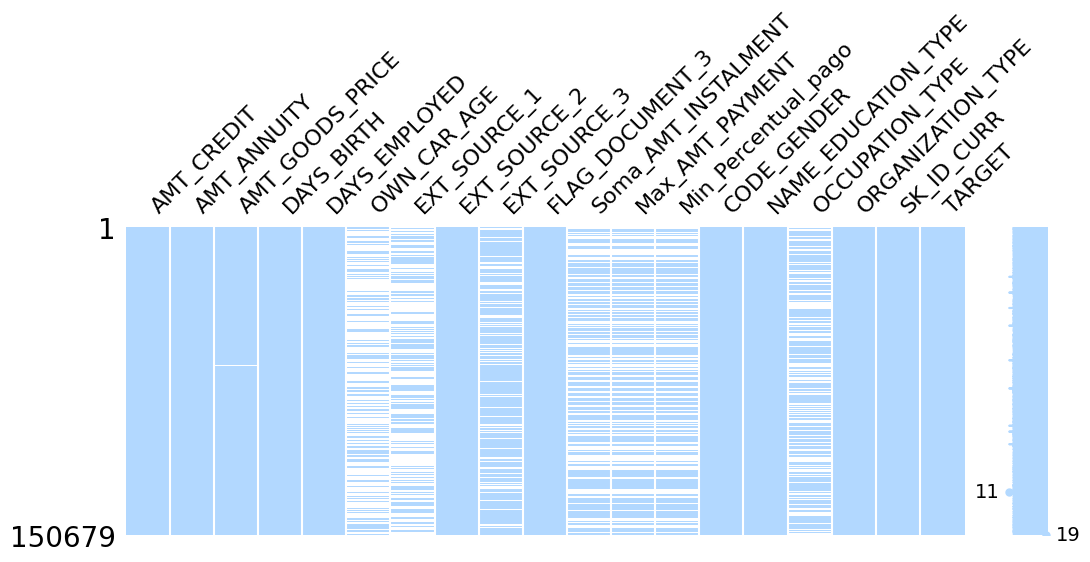

In [ ]:
# Visualização da Matriz de Dados Ausentes
import missingno as msno
msno.matrix(train, color=(0.7, 0.85, 1), figsize=(12, 4))

#3.2 Tratamento do conjunto de treino

Aqui iremos realizar o tratamento das variavéis nulas do nosso conjunto de treino e replicar este tratamento em nosso conjunto de Teste para evitar o Data Leakage


In [ ]:
# Excluindo as colunas 'TARGET' e 'SK_ID_CURR' do conjunto de treino
abt_train_01 = train.drop(axis=1,columns=['TARGET','SK_ID_CURR'],inplace=False)

# Preenchimento de Dados Ausentes e obtenção das médias
abt_train_01, means = pod.pod_custom_fillna(abt_train_01)

# Salvando as médias em um arquivo pickle
with open('.../prd_fillna.pkl', 'wb') as f:
  pickle.dump(means, f)

In [ ]:
# Carregando as médias para conferência

with open('.../prd_fillna.pkl', 'rb') as f:
  loaded_means = pickle.load(f)
loaded_means

{'AMT_CREDIT': 599845.5172917261,
 'AMT_ANNUITY': 27149.62152063395,
 'AMT_GOODS_PRICE': 539122.5637288766,
 'DAYS_BIRTH': -16035.914852102815,
 'DAYS_EMPLOYED': 63599.31629036754,
 'OWN_CAR_AGE': 12.035873743060138,
 'EXT_SOURCE_1': 0.5031859956528094,
 'EXT_SOURCE_2': 0.5145058417827371,
 'EXT_SOURCE_3': 0.510793838732432,
 'FLAG_DOCUMENT_3': 0.7095680220866876,
 'Soma_AMT_INSTALMENT': 44607008.06545636,
 'Max_AMT_PAYMENT': 152375.49251692096,
 'Min_Percentual_pago': 57.671493499263285}

In [ ]:
# Aplicando o preenchimento nos conjuntos de validação e produção

abt_test_01 = pod.pod_custom_fillna_prod(test,loaded_means)
abt_prod_00 = pod.pod_custom_fillna_prod(df_test_03, loaded_means)

# Verificando as dimensões dos conjuntos resultantes

abt_test_01.shape, abt_prod_00.shape

/content/pod_academy_functions.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(-1, np.nan, inplace=True)
/content/pod_academy_functions.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)
/content/pod_academy_functions.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].filln

((64578, 19), (92254, 18))

In [ ]:
# Mesclando as colunas 'TARGET' e 'SK_ID_CURR' de volta ao conjunto de treino
abt_train_02 = abt_train_01.merge(train[['TARGET','SK_ID_CURR']], left_index=True, right_index=True, how='inner')
abt_train_02.head()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,Soma_AMT_INSTALMENT,Max_AMT_PAYMENT,Min_Percentual_pago,CODE_GENDER,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
45499,709033.5,39721.5,657000.0,-11687,-1430.0,12.035874,0.503186,0.246830,0.413597,1,6.170546e+06,45000.000000,100.000000,F,Secondary / secondary special,Sales staff,Business Entity Type 3,0,102669
74186,640080.0,31261.5,450000.0,-12453,-158.0,12.035874,0.495899,0.452236,0.276441,1,4.460701e+07,152375.492517,57.671493,F,Higher education,Laborers,Business Entity Type 2,1,202196
65253,104256.0,8194.5,90000.0,-9859,-392.0,12.035874,0.352115,0.135407,0.656158,1,4.460701e+07,152375.492517,57.671493,F,Higher education,Sales staff,Self-employed,0,272854
60400,755190.0,36328.5,675000.0,-9233,-878.0,12.035874,0.398403,0.372591,0.510794,1,3.616066e+06,44642.790000,100.000000,F,Higher education,Core staff,School,0,207628
71140,521280.0,25209.0,450000.0,-15201,-2196.0,12.035874,0.244596,0.317423,0.634706,1,4.460701e+07,152375.492517,57.671493,F,Secondary / secondary special,Core staff,Self-employed,1,244369


<Axes: >

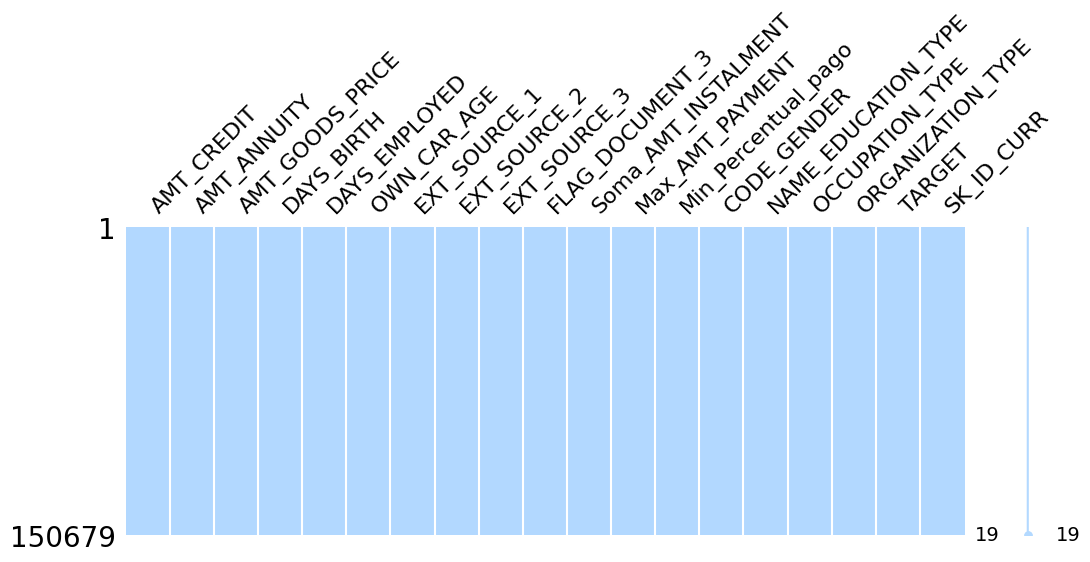

In [ ]:
# Visualizando o mapa de missing usando missingno em tom azul
msno.matrix(abt_train_02, color=(0.7, 0.85, 1), figsize=(12, 4))

In [ ]:
# Geração de metadados após o processo de preenchimento de dados ausentes e visualização exploratória

metadados_fs = pod.pod_academy_generate_metadata(abt_train_02,
                                          ids=['SK_ID_CURR'],
                                          targets=['TARGET'],
                                          orderby = 'CARDINALIDADE')

metadados_fs

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,SK_ID_CURR,ID,0,0.0,150679,int64
1,EXT_SOURCE_2,Explicativa,0,0.0,84606,float64
2,Soma_AMT_INSTALMENT,Explicativa,0,0.0,81159,float64
3,Max_AMT_PAYMENT,Explicativa,0,0.0,68796,float64
4,EXT_SOURCE_1,Explicativa,0,0.0,60797,float64
5,Min_Percentual_pago,Explicativa,0,0.0,35159,float64
6,DAYS_BIRTH,Explicativa,0,0.0,17249,int64
7,AMT_ANNUITY,Explicativa,0,0.0,11936,float64
8,DAYS_EMPLOYED,Explicativa,0,0.0,10912,float64
9,AMT_CREDIT,Explicativa,0,0.0,4625,float64


#4.0 Tratamento das Variáveis - Label Encoding

Nesta etapa aplicaremos o Label Encoding em nossas variáveis categóricas com cardinalidade > 15

In [ ]:
# Escolha de variáveis categóricas para Label Encoding com base na cardinalidade

card_cutoff = 15
df_categ_labelenc = metadados[(metadados['CARDINALIDADE'] > card_cutoff) & (metadados['TIPO_FEATURE'] == 'object')]
lista_vars_abt = list(abt_train_02.columns)
lista_lenc = list(df_categ_labelenc.FEATURE.values)


print('Lista de vars para Label Encoding: ',lista_lenc)

Lista de vars para Label Encoding:  ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


In [ ]:
# Aplicação do Label Encoding nas variáveis categóricas selecionadas
import pickle
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in lista_lenc:
    encoder = LabelEncoder()
    abt_train_02[col] = encoder.fit_transform(abt_train_02[col])

    # Armazena o encoder para a coluna atual em um dicionário
    encoders[col] = encoder

# Salva o dicionário de encoders e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoders': encoders,
    'columns': lista_lenc
}

with open('.../prd_labelenc.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

In [ ]:
# Carregar os encoders e a lista de colunas
with open('.../prd_labelenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoders = loaded_data['encoders']
loaded_columns = loaded_data['columns']

# Aplicação do Label Encoding nas bases de teste e produção
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        abt_test_01[col] = loaded_encoders[col].transform(abt_test_01[col])

for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        abt_prod_00[col] = loaded_encoders[col].transform(abt_prod_00[col])

<ipython-input-24-b8ac241ce270>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_prod_00[col] = loaded_encoders[col].transform(abt_prod_00[col])
<ipython-input-24-b8ac241ce270>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_prod_00[col] = loaded_encoders[col].transform(abt_prod_00[col])


#4.1 Tratamento das Variáveis - OneHot Encoding

Para nossas variáveis com cardinalidade <= 15 iremos realizar o OneHot Encoding

In [ ]:
import pickle
from sklearn.preprocessing import OneHotEncoder

card_cutoff = 15
df_categ_onehot = metadados[(metadados['CARDINALIDADE'] <= card_cutoff) & (metadados['TIPO_FEATURE'] == 'object')]
lista_onehot = list(df_categ_onehot.FEATURE.values)
print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(abt_train_02[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=abt_train_02.index)

abt_train_02 = pd.concat([abt_train_02.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}

with open('.../prd_onehotenc.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)


Lista de vars para OneHot Encoding:  ['NAME_EDUCATION_TYPE', 'CODE_GENDER']


In [ ]:
# Carregar o encoder e a lista de colunas
with open('.../prd_onehotenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']

# Aplicação do One-Hot Encoding nas bases de teste e produção
encoded_data_test = loaded_encoder.transform(abt_test_01[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=abt_test_01.index)

abt_test_01 = pd.concat([abt_test_01.drop(loaded_columns, axis=1), encoded_df_test], axis=1)


encoded_data_test = loaded_encoder.transform(abt_prod_00[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=abt_prod_00.index)

abt_prod_00 = pd.concat([abt_prod_00.drop(loaded_columns, axis=1), encoded_df_test], axis=1)


# 4.3 Análise de Variáveis apos transformação

Aqui iremos checar nossas variáveis categóricas após aplicação de tratamentos para alta e baixa cardinalidade

In [ ]:
metadados_fs = pod.pod_academy_generate_metadata(abt_train_02,
                                          ids=['SK_ID_CURR'],
                                          targets=['TARGET'],
                                          orderby = 'CARDINALIDADE')

metadados_fs

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,SK_ID_CURR,ID,0,0.0,150679,int64
1,EXT_SOURCE_2,Explicativa,0,0.0,84606,float64
2,Soma_AMT_INSTALMENT,Explicativa,0,0.0,81159,float64
3,Max_AMT_PAYMENT,Explicativa,0,0.0,68796,float64
4,EXT_SOURCE_1,Explicativa,0,0.0,60797,float64
5,Min_Percentual_pago,Explicativa,0,0.0,35159,float64
6,DAYS_BIRTH,Explicativa,0,0.0,17249,int64
7,AMT_ANNUITY,Explicativa,0,0.0,11936,float64
8,DAYS_EMPLOYED,Explicativa,0,0.0,10912,float64
9,AMT_CREDIT,Explicativa,0,0.0,4625,float64


In [ ]:
df_ordinais = metadados_fs[(metadados_fs['CARDINALIDADE'] <= 58) & (metadados_fs['USO_FEATURE'] == 'Explicativa') & (metadados_fs['FEATURE'] != 'OWN_CAR_AGE')]
df_ordinais

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
13,ORGANIZATION_TYPE,Explicativa,0,0.0,58,int64
14,OCCUPATION_TYPE,Explicativa,0,0.0,19,int64
15,FLAG_DOCUMENT_3,Explicativa,0,0.0,2,int64
17,NAME_EDUCATION_TYPE_Higher education,Explicativa,0,0.0,2,float64
18,NAME_EDUCATION_TYPE_Incomplete higher,Explicativa,0,0.0,2,float64
19,NAME_EDUCATION_TYPE_Lower secondary,Explicativa,0,0.0,2,float64
20,NAME_EDUCATION_TYPE_Secondary / secondary special,Explicativa,0,0.0,2,float64
21,CODE_GENDER_M,Explicativa,0,0.0,2,float64
22,CODE_GENDER_XNA,Explicativa,0,0.0,2,float64


In [ ]:
vars_ordinais = list(df_ordinais.FEATURE)
vars_ordinais

['ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_DOCUMENT_3',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA']

In [ ]:
def analyze_variable(dataframe, variable, target):
  import pandas as pd
  import matplotlib.pyplot as plt

  # Se a variável for numérica, arredonda para 4 casas decimais
  if pd.api.types.is_numeric_dtype(dataframe[variable]):
      dataframe[variable] = dataframe[variable].round(4)
      dataframe[variable] = dataframe[variable].astype(str)

  # Calcula a taxa de evento e o volume para cada categoria da variável
  result = dataframe.groupby(variable).agg({target: 'mean', variable: 'count'}).rename(columns={variable: 'Volume'}).reset_index()
  result.columns = [variable, 'Taxa_de_Evento', 'Volume']

  # Ordena o resultado pela Taxa de Evento em ordem decrescente
  result = result.sort_values(by='Taxa_de_Evento', ascending=False)

  # Plota o gráfico
  fig, ax1 = plt.subplots(figsize=(12, 6))

  # Eixo Y esquerdo: Volume
  bars = ax1.bar(result[variable], result['Volume'], color='lightblue', label='Volume (Barras)')
  ax1.set_xlabel(variable)
  ax1.set_ylabel('Volume', color='black')
  ax1.tick_params(axis='y', labelcolor='black')

  # Eixo Y direito: Taxa de Evento
  ax2 = ax1.twinx()
  lines = ax2.plot(result[variable], result['Taxa_de_Evento'] * 100, marker='o', linestyle='-', color='hotpink', label='Taxa de Evento (Linha)')
  ax2.set_ylabel('Taxa de Evento (%)', color='black')
  ax2.tick_params(axis='y', labelcolor='black')

  # Combina as legendas de ambos os eixos, filtrando rótulos que começam com '_'
  plots = [item for item in bars + tuple(lines) if not item.get_label().startswith('_')]
  labels = [plot.get_label() for plot in plots]
  plt.legend(plots, labels, loc='upper left')

  plt.title(f'Volume e Taxa de Evento por {variable}')
  plt.xticks(rotation=45)  # Adicionado para melhor visualização dos labels no eixo X
  plt.tight_layout()
  plt.show()

  return result

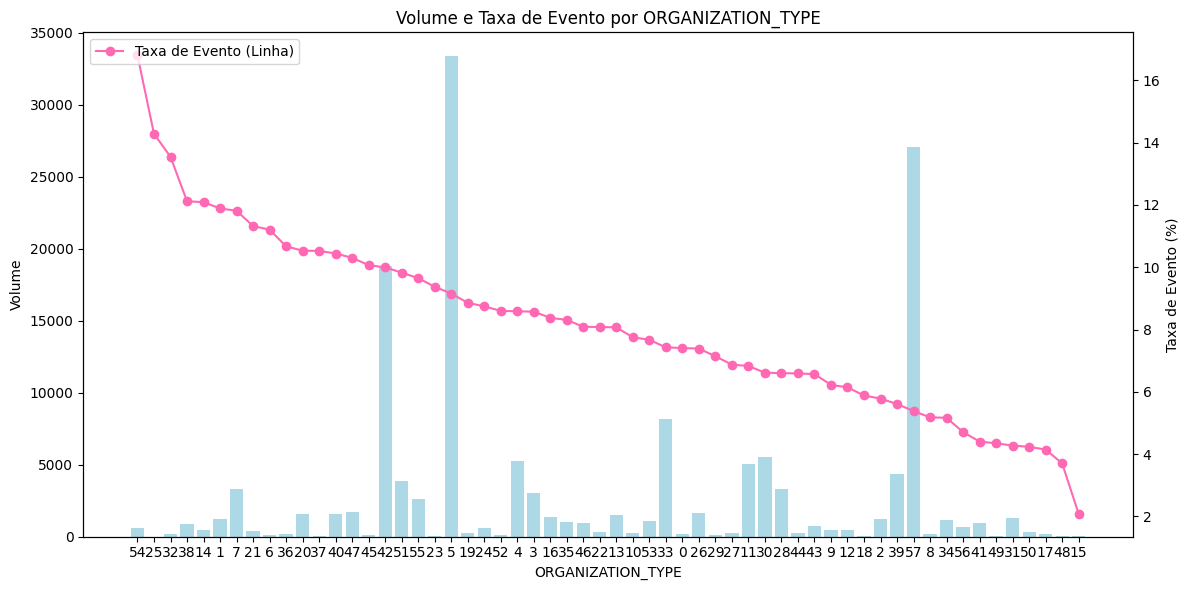

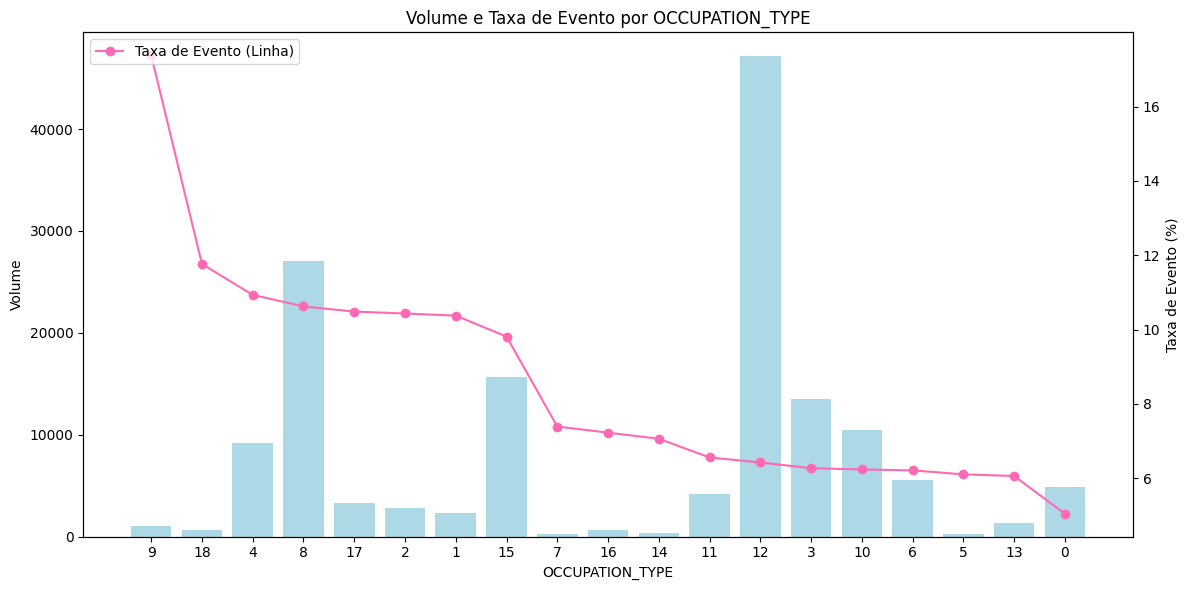

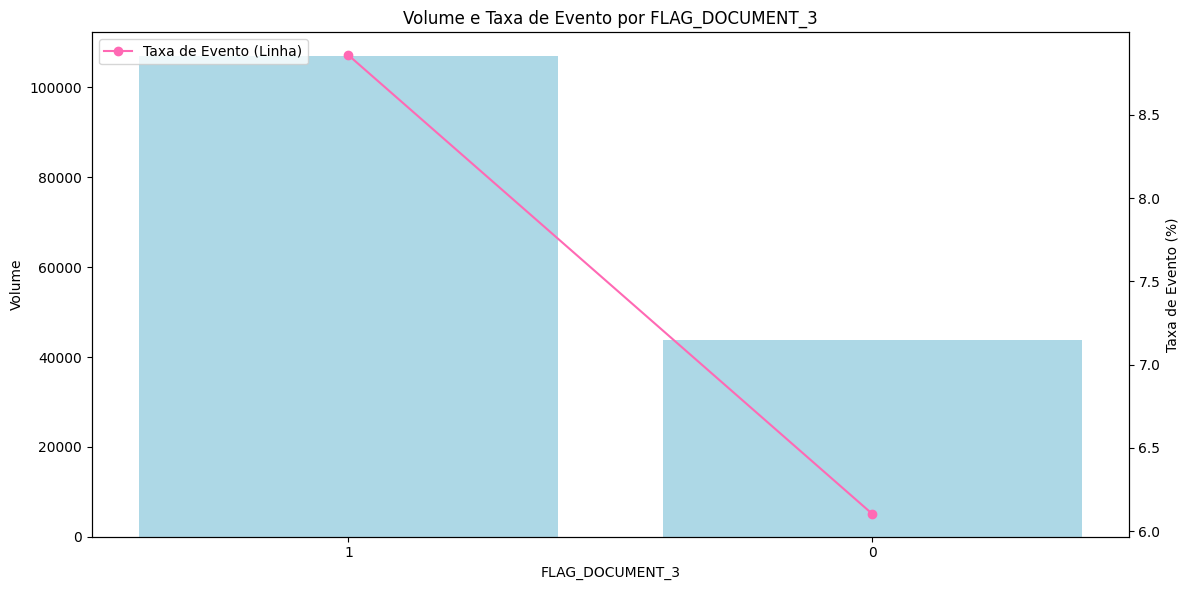

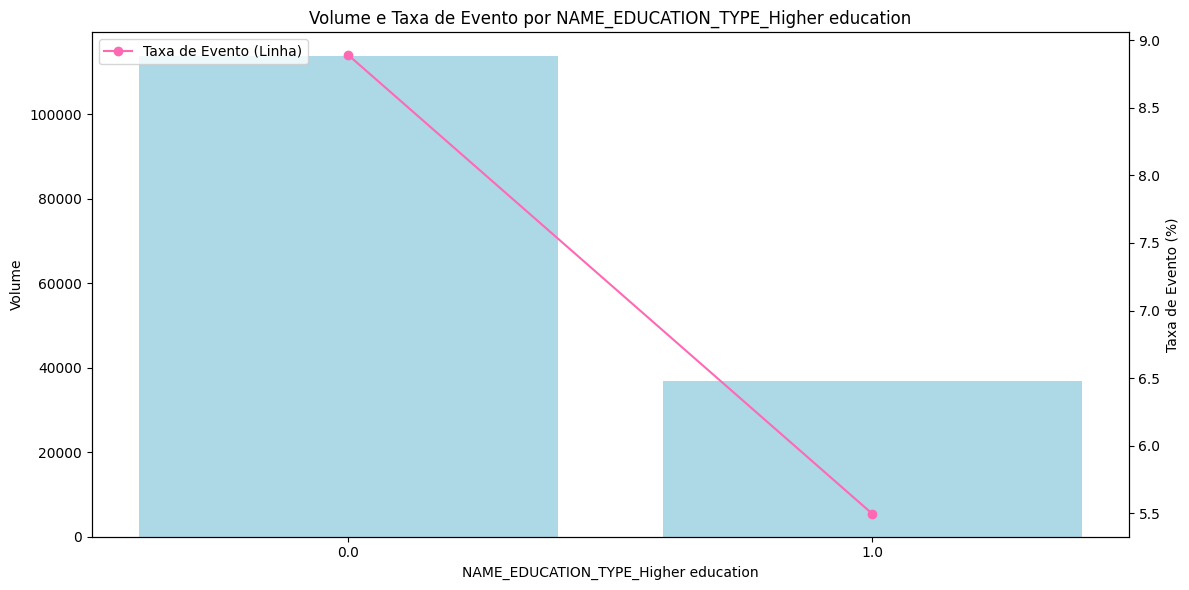

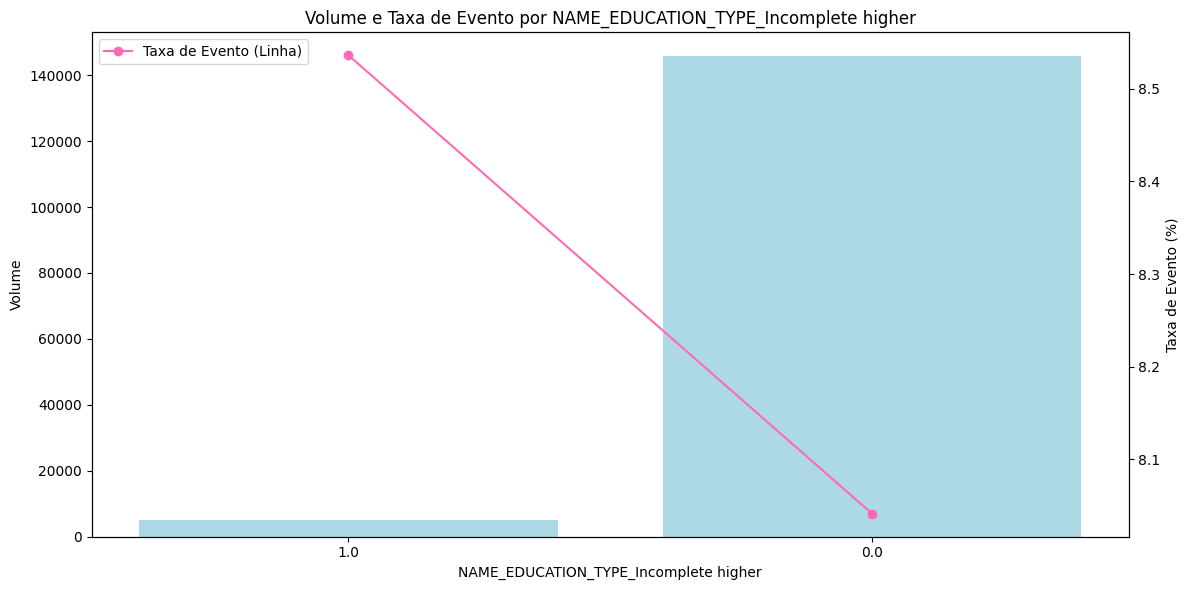

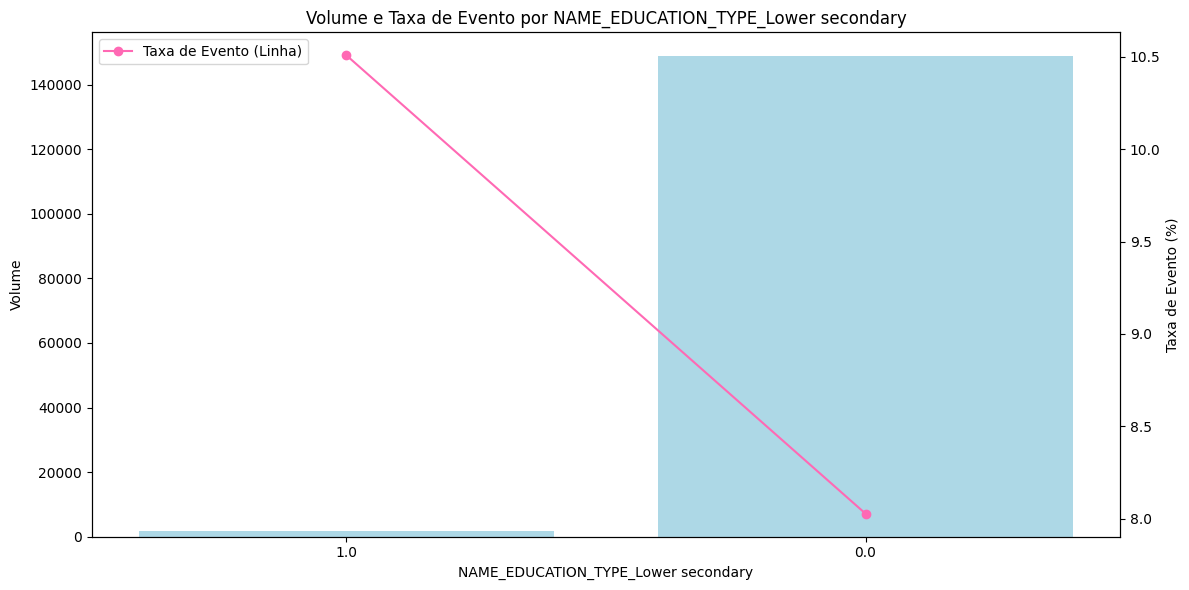

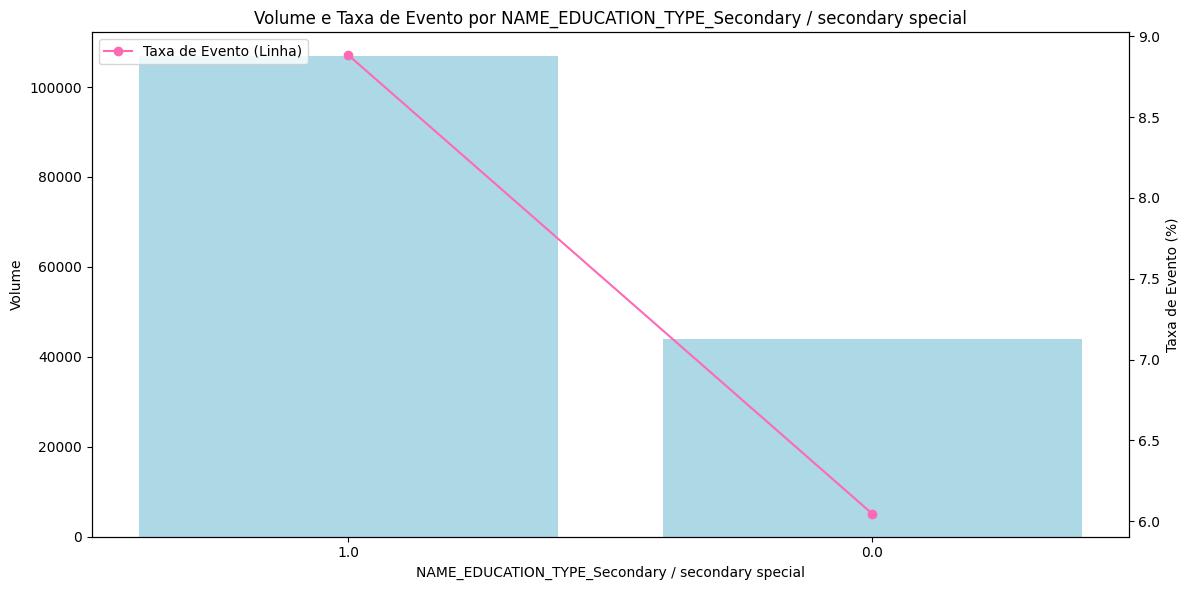

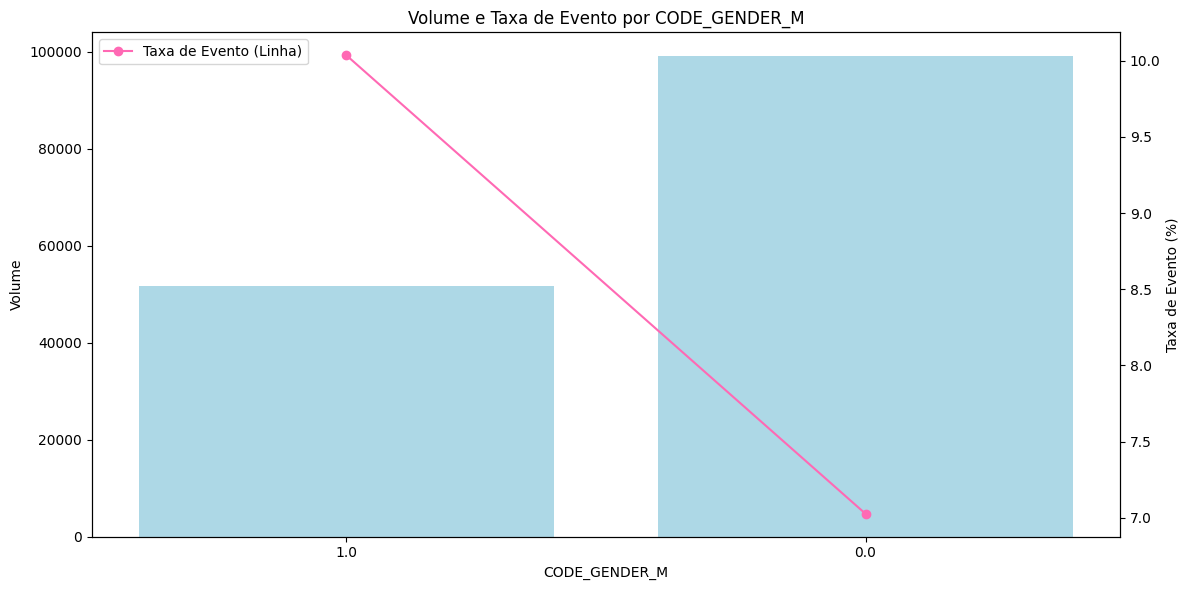

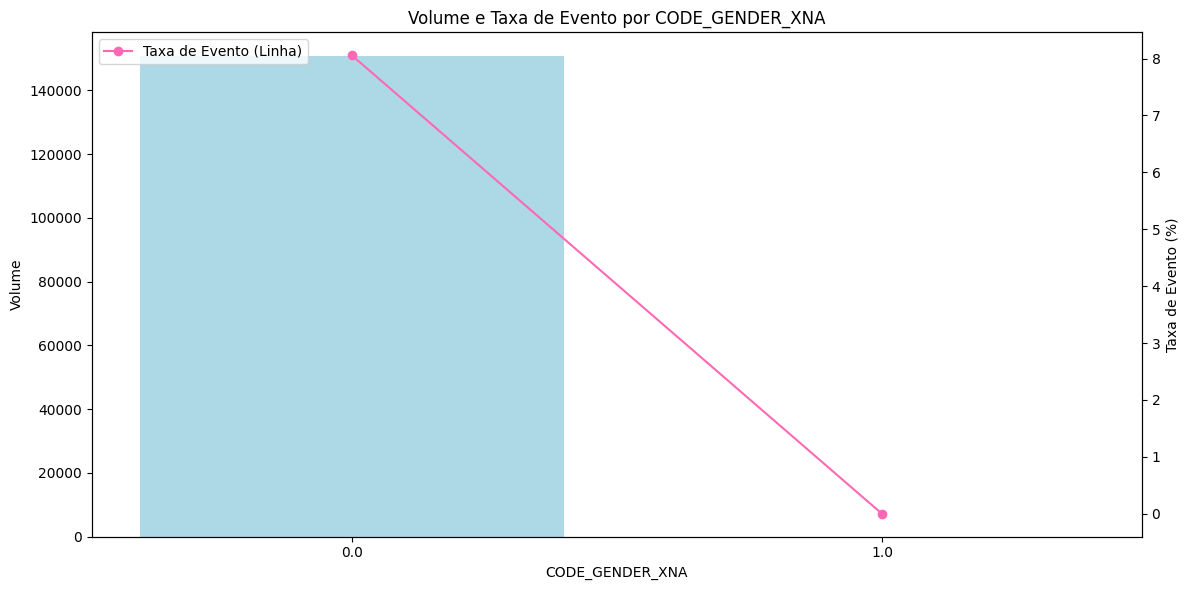

In [ ]:
for var in vars_ordinais:
  result = analyze_variable(abt_train_02, var, "TARGET")

In [ ]:
abt_train_02.head()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,...,OCCUPATION_TYPE,ORGANIZATION_TYPE,TARGET,SK_ID_CURR,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_M,CODE_GENDER_XNA
45499,709033.5,39721.5,657000.0,-11687,-1430.0,12.035874,0.503186,0.246830,0.413597,1,...,15,5,0,102669,0.0,0.0,0.0,1.0,0.0,0.0
74186,640080.0,31261.5,450000.0,-12453,-158.0,12.035874,0.495899,0.452236,0.276441,1,...,8,4,1,202196,1.0,0.0,0.0,0.0,0.0,0.0
65253,104256.0,8194.5,90000.0,-9859,-392.0,12.035874,0.352115,0.135407,0.656158,1,...,15,42,0,272854,1.0,0.0,0.0,0.0,0.0,0.0
60400,755190.0,36328.5,675000.0,-9233,-878.0,12.035874,0.398403,0.372591,0.510794,1,...,3,39,0,207628,1.0,0.0,0.0,0.0,0.0,0.0
71140,521280.0,25209.0,450000.0,-15201,-2196.0,12.035874,0.244596,0.317423,0.634706,1,...,3,42,1,244369,0.0,0.0,0.0,1.0,0.0,0.0


#4.4 - Tratamento de Variáveis Númericas

Nesta etapa iremos realizar uma transformação manual, buscando categorizar nossas variavéis numéricas, fazendo também uma análise das mesmas.

In [ ]:
df_numericas = metadados_fs[(metadados_fs['CARDINALIDADE']>20) & (metadados_fs['USO_FEATURE']=='Explicativa')& (metadados_fs['FEATURE'] != 'ORGANIZATION_TYPE')]
df_numericas

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
1,EXT_SOURCE_2,Explicativa,0,0.0,84606,float64
2,Soma_AMT_INSTALMENT,Explicativa,0,0.0,81159,float64
3,Max_AMT_PAYMENT,Explicativa,0,0.0,68796,float64
4,EXT_SOURCE_1,Explicativa,0,0.0,60797,float64
5,Min_Percentual_pago,Explicativa,0,0.0,35159,float64
6,DAYS_BIRTH,Explicativa,0,0.0,17249,int64
7,AMT_ANNUITY,Explicativa,0,0.0,11936,float64
8,DAYS_EMPLOYED,Explicativa,0,0.0,10912,float64
9,AMT_CREDIT,Explicativa,0,0.0,4625,float64
10,EXT_SOURCE_3,Explicativa,0,0.0,787,float64


In [ ]:
vars_numericas = list(df_numericas.FEATURE)
vars_numericas

['EXT_SOURCE_2',
 'Soma_AMT_INSTALMENT',
 'Max_AMT_PAYMENT',
 'EXT_SOURCE_1',
 'Min_Percentual_pago',
 'DAYS_BIRTH',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'EXT_SOURCE_3',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE']

In [ ]:
import pandas as pd


# Convertendo a coluna DAYS_BIRTH para float no DataFrame abt_train_02
abt_train_02['DAYS_BIRTH'] = abt_train_02['DAYS_BIRTH'].astype(float)

# Convertendo a coluna DAYS_BIRTH para float no DataFrame abt_test_01
abt_test_01['DAYS_BIRTH'] = abt_test_01['DAYS_BIRTH'].astype(float)

# Convertendo a coluna DAYS_BIRTH para float no DataFrame abt_prod_00
abt_prod_00['DAYS_BIRTH'] = abt_prod_00['DAYS_BIRTH'].astype(float)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def categorize_with_decision_tree(dataframe, n_categories, target, numeric_var):
  import numpy as np
  # Preparar os dados
  X = dataframe[[numeric_var]]
  y = dataframe[target]

  # Treinar uma árvore de decisão com profundidade máxima igual ao número de categorias desejadas
  tree = DecisionTreeClassifier(max_leaf_nodes=n_categories)
  tree.fit(X, y)

  # Predizer a categoria (folha) para cada entrada no DataFrame
  leaf_ids = tree.apply(X)

  # Criar um DataFrame temporário com as categorias (folhas), a variável numérica e o target
  temp_df = pd.DataFrame({numeric_var: dataframe[numeric_var], 'Leaf': leaf_ids, target: y})

  result = temp_df.groupby('Leaf').agg({target: 'mean', numeric_var: ['count', 'min', 'max']}).reset_index()
  result.columns = ['Leaf', 'Taxa_de_Evento', 'Volume', 'Lower_Bound', 'Upper_Bound']

  # Ajuste para garantir que os limites superior e inferior de bins adjacentes não se sobreponham
  result = result.sort_values(by='Lower_Bound')
  for i in range(1, len(result)):
      result.iloc[i, 3] = max(result.iloc[i, 3], result.iloc[i-1, 4])

  # Definir o limite inferior do primeiro bin como -inf e o limite superior do último bin como inf
  result.iloc[0, 3] = -np.inf
  result.iloc[-1, 4] = np.inf

  return result

def apply_tree_bins(data, transformation_df, numeric_var):

  import numpy as np
  df_copy = data.copy()

  # Obtenha os limites superiores e ordene-os
  upper_bounds = transformation_df['Upper_Bound'].sort_values().values

  # Use numpy.digitize para determinar a qual bin cada valor pertence
  df_copy[f"TFT_{numeric_var}"] = np.digitize(df_copy[numeric_var].values, upper_bounds)
  df_copy.drop(axis=1,columns=[numeric_var],inplace=True)

  return df_copy



In [ ]:
abt_train_02.head()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,...,OCCUPATION_TYPE,ORGANIZATION_TYPE,TARGET,SK_ID_CURR,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_M,CODE_GENDER_XNA
45499,709033.5,39721.5,657000.0,-11687.0,-1430.0,12.035874,0.503186,0.246830,0.413597,1,...,15,5,0,102669,0.0,0.0,0.0,1.0,0.0,0.0
74186,640080.0,31261.5,450000.0,-12453.0,-158.0,12.035874,0.495899,0.452236,0.276441,1,...,8,4,1,202196,1.0,0.0,0.0,0.0,0.0,0.0
65253,104256.0,8194.5,90000.0,-9859.0,-392.0,12.035874,0.352115,0.135407,0.656158,1,...,15,42,0,272854,1.0,0.0,0.0,0.0,0.0,0.0
60400,755190.0,36328.5,675000.0,-9233.0,-878.0,12.035874,0.398403,0.372591,0.510794,1,...,3,39,0,207628,1.0,0.0,0.0,0.0,0.0,0.0
71140,521280.0,25209.0,450000.0,-15201.0,-2196.0,12.035874,0.244596,0.317423,0.634706,1,...,3,42,1,244369,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Exemplo de Categorização de Variável Numérica 'AMT_ANNUITY'

result = categorize_with_decision_tree(abt_train_02, n_categories=5, target='TARGET', numeric_var='EXT_SOURCE_2')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
3,7,0.379048,525,-inf,0.008336
4,8,0.213543,6542,0.008364,0.125908
0,4,0.122365,31210,0.125927,0.397333
1,5,0.072580,68035,0.397343,0.647892
2,6,0.040300,44367,0.647897,inf


In [ ]:
# Aplicando os bins ao conjunto de dados

abt_train_03 = apply_tree_bins(abt_train_02, result, numeric_var='EXT_SOURCE_2')
abt_test_02 = apply_tree_bins(abt_test_01, result, numeric_var='EXT_SOURCE_2')
abt_prod_01 = apply_tree_bins(abt_prod_00, result, numeric_var='EXT_SOURCE_2')

In [ ]:
abt_train_03.TFT_EXT_SOURCE_2.unique()

array([2, 3, 4, 1, 0])

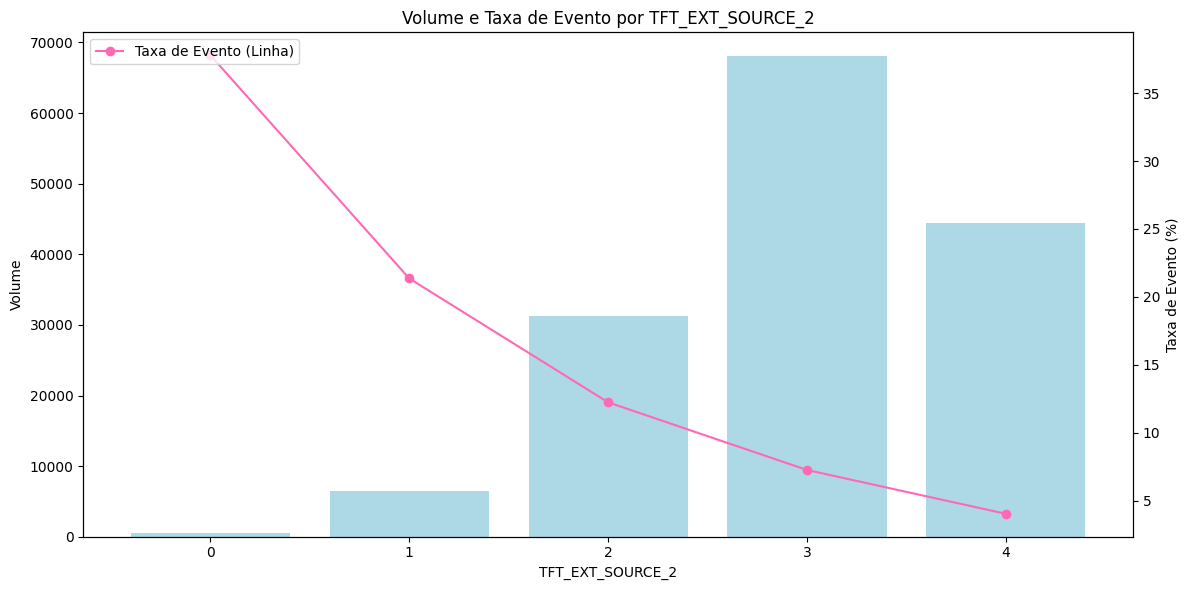

In [ ]:
result = analyze_variable(abt_train_03, 'TFT_EXT_SOURCE_2', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_03, n_categories=5, target='TARGET', numeric_var='Soma_AMT_INSTALMENT')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
0,1,0.106161,14299,-inf,1.745688e+06
3,7,0.083590,19823,1.745745e+06,8.039372e+06
4,8,0.068296,26385,8.041022e+06,4.460617e+07
2,6,0.083150,69417,4.460701e+07,4.460701e+07
1,4,0.067068,20755,4.461541e+07,inf


In [ ]:
abt_train_04 = apply_tree_bins(abt_train_03, result, numeric_var='Soma_AMT_INSTALMENT')
abt_test_03 = apply_tree_bins(abt_test_02, result, numeric_var='Soma_AMT_INSTALMENT')
abt_prod_02 = apply_tree_bins(abt_prod_01, result, numeric_var='Soma_AMT_INSTALMENT')

In [ ]:
abt_train_04.TFT_Soma_AMT_INSTALMENT.unique()

array([1, 4, 2, 0, 3])

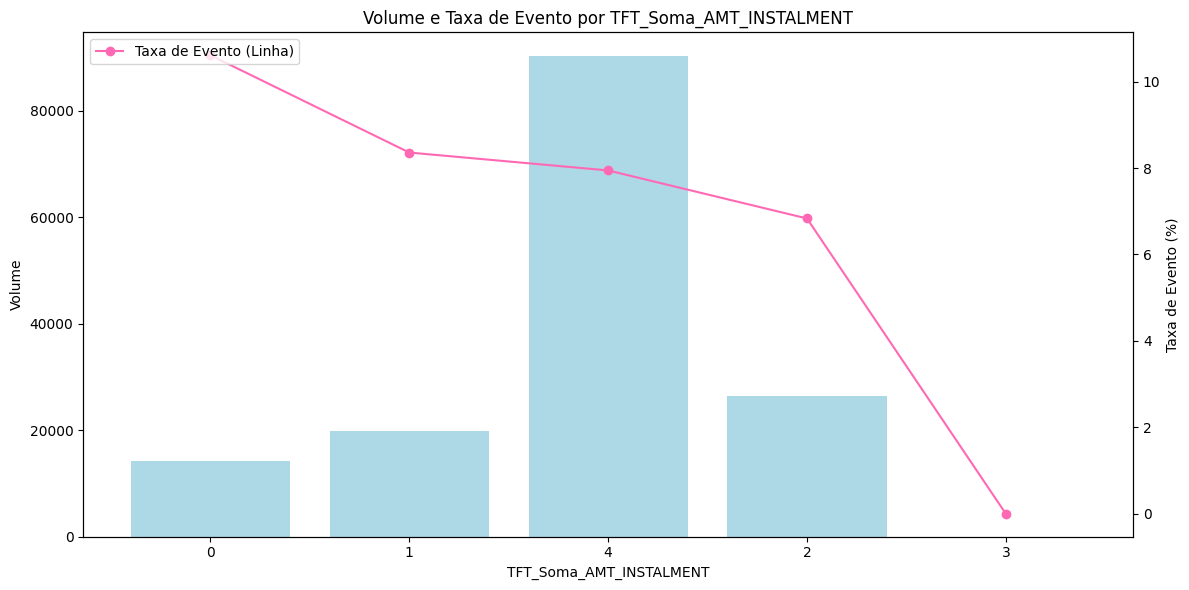

In [ ]:
result = analyze_variable(abt_train_04, 'TFT_Soma_AMT_INSTALMENT', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_04, n_categories=5, target='TARGET', numeric_var='Max_AMT_PAYMENT')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
0,1,0.111395,9794,-inf,10130.175
3,7,0.084562,10856,10130.760,16419.420
4,8,0.800000,5,16420.005,16420.005
2,6,0.066633,39650,16420.095,151305.930
1,4,0.082834,90374,151313.625,inf


In [ ]:
abt_train_05 = apply_tree_bins(abt_train_04, result, numeric_var='Max_AMT_PAYMENT')
abt_test_04 = apply_tree_bins(abt_test_03, result, numeric_var='Max_AMT_PAYMENT')
abt_prod_03 = apply_tree_bins(abt_prod_02, result, numeric_var='Max_AMT_PAYMENT')

In [ ]:
abt_train_05.TFT_Max_AMT_PAYMENT.unique()

array([3, 4, 1, 0, 2])

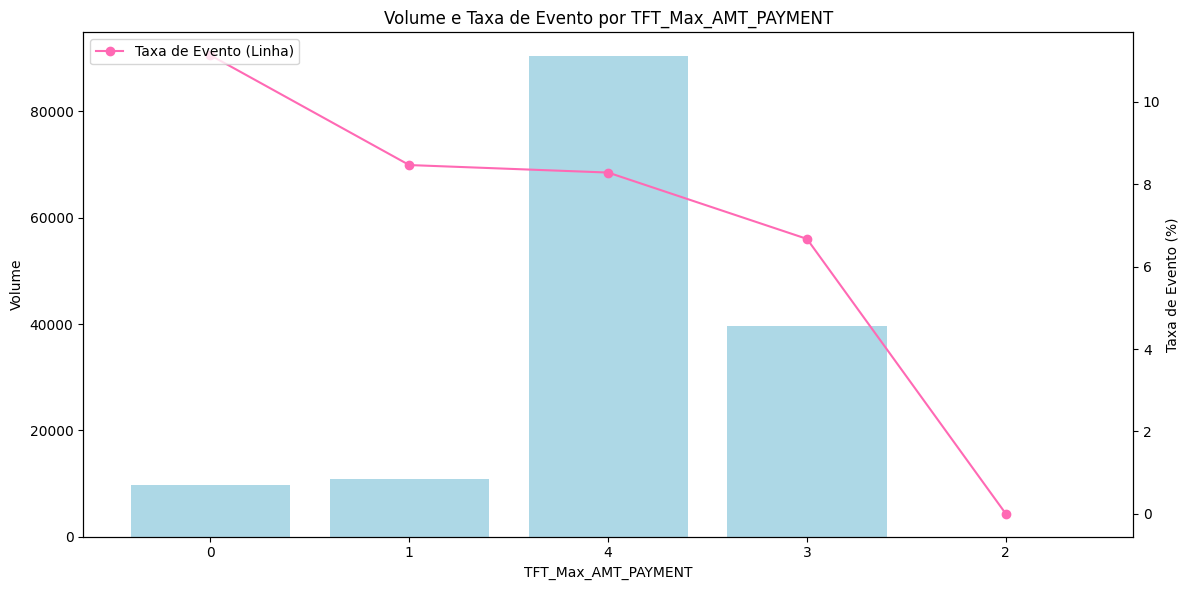

In [ ]:
result = analyze_variable(abt_train_05, 'TFT_Max_AMT_PAYMENT', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_05, n_categories=5, target='TARGET', numeric_var='EXT_SOURCE_1')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
3,7,0.419355,124,-inf,0.044442
4,8,0.219512,1476,0.044564,0.120643
2,6,0.140167,8975,0.120656,0.265383
0,3,0.083626,112859,0.265388,0.565590
1,4,0.039237,27245,0.565609,inf


In [ ]:
abt_train_06 = apply_tree_bins(abt_train_05, result, numeric_var='EXT_SOURCE_1')
abt_test_05 = apply_tree_bins(abt_test_04, result, numeric_var='EXT_SOURCE_1')
abt_prod_04 = apply_tree_bins(abt_prod_03, result, numeric_var='EXT_SOURCE_1')

In [ ]:
abt_train_06.TFT_EXT_SOURCE_1.unique()

array([3, 2, 4, 1, 0])

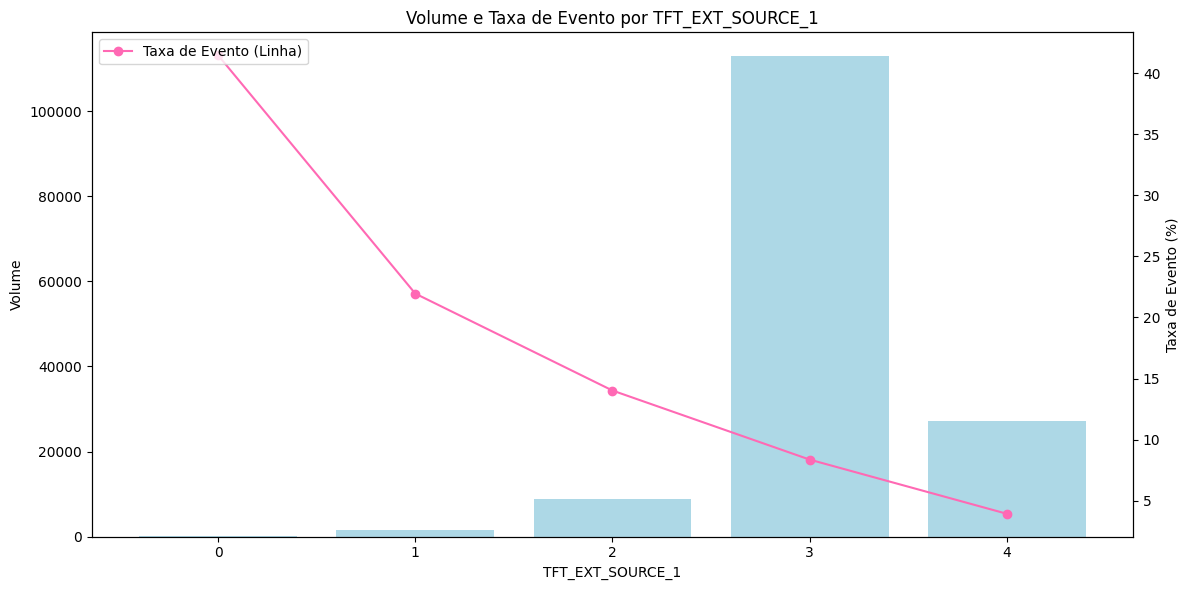

In [ ]:
result = analyze_variable(abt_train_06, 'TFT_EXT_SOURCE_1', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_06, n_categories=5, target='TARGET', numeric_var='Min_Percentual_pago')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
3,7,0.068358,1931,-inf,0.005641
4,8,0.093892,32431,0.005643,29.909104
2,6,1.000000,3,29.926604,29.949779
1,4,0.083105,71608,29.980053,99.993532
0,2,0.067329,44706,99.994002,inf


In [ ]:
abt_train_07 = apply_tree_bins(abt_train_06, result, numeric_var='Min_Percentual_pago')
abt_test_06 = apply_tree_bins(abt_test_05, result, numeric_var='Min_Percentual_pago')
abt_prod_05 = apply_tree_bins(abt_prod_04, result, numeric_var='Min_Percentual_pago')

In [ ]:
abt_train_07.TFT_Min_Percentual_pago.unique()

array([4, 3, 1, 0, 2])

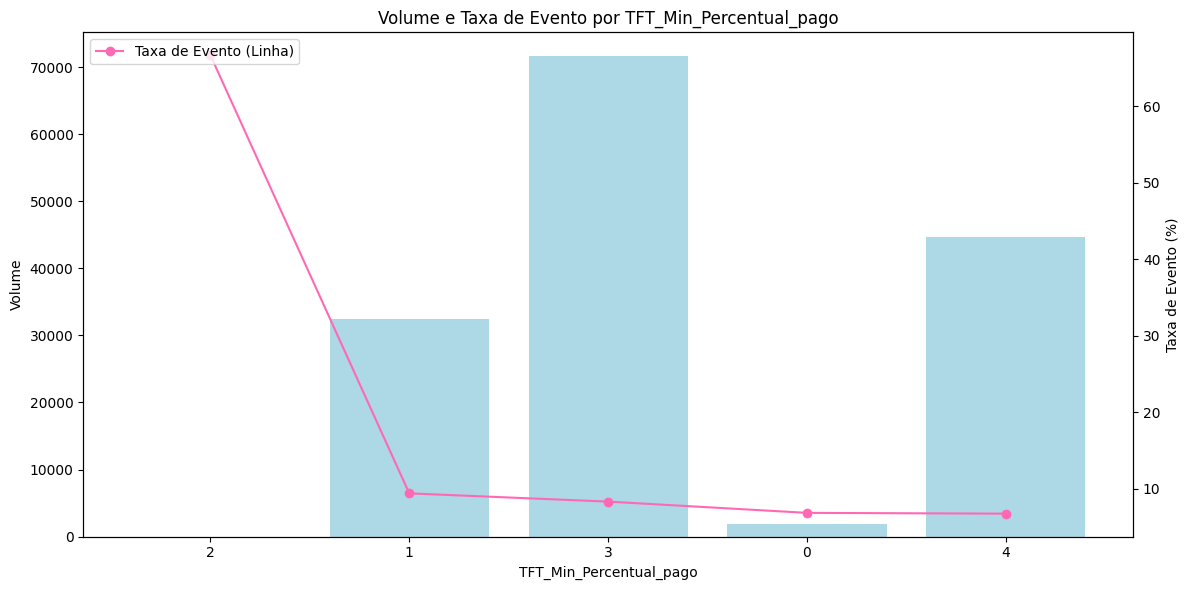

In [ ]:
result = analyze_variable(abt_train_07, 'TFT_Min_Percentual_pago', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_07, n_categories=5, target='TARGET', numeric_var='DAYS_BIRTH')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
0,3,0.051852,34309,-inf,-20008.0
1,4,0.073515,53241,-20007.0,-14671.0
2,5,0.092443,35860,-14670.0,-11449.0
3,7,0.112045,23678,-11448.0,-8680.0
4,8,0.133668,3591,-8679.0,inf


In [ ]:
abt_train_08 = apply_tree_bins(abt_train_07, result, numeric_var='DAYS_BIRTH')
abt_test_07 = apply_tree_bins(abt_test_06, result, numeric_var='DAYS_BIRTH')
abt_prod_06 = apply_tree_bins(abt_prod_05, result, numeric_var='DAYS_BIRTH')

In [ ]:
abt_train_08.TFT_DAYS_BIRTH.unique()

array([2, 3, 1, 0, 4])

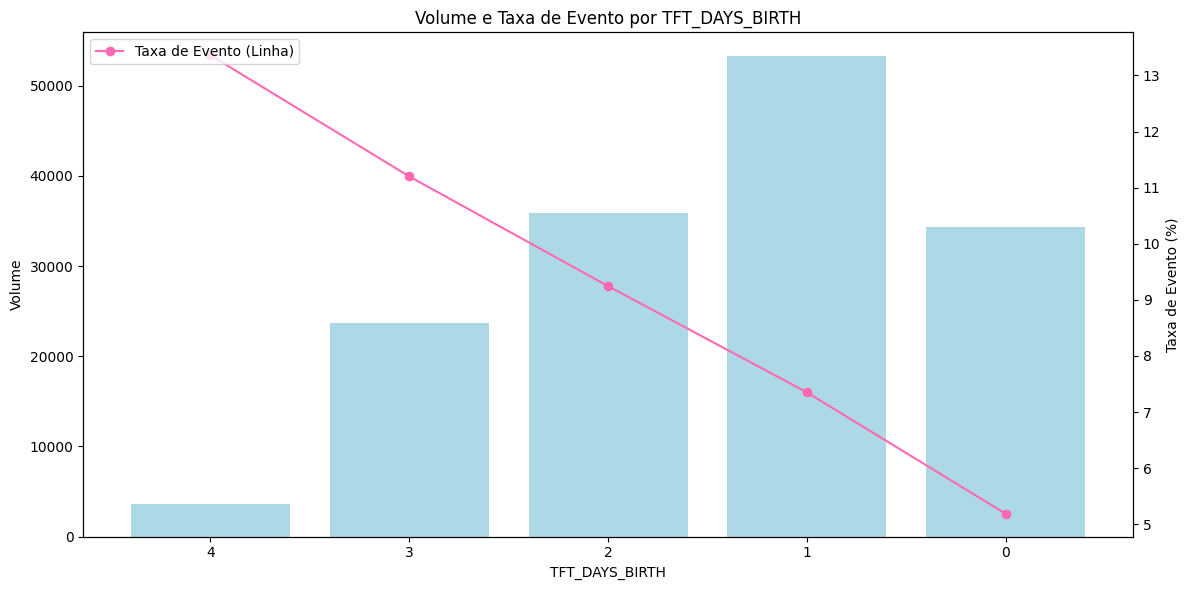

In [ ]:
result = analyze_variable(abt_train_08, 'TFT_DAYS_BIRTH', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_08, n_categories=5, target='TARGET', numeric_var='AMT_ANNUITY')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
0,3,0.069192,37678,-inf,16519.5
3,7,0.089089,94591,16524.0,43569.0
4,8,0.189394,132,43573.5,43672.5
1,5,0.064937,15030,43677.0,62653.5
2,6,0.032635,3248,62658.0,inf


In [ ]:
abt_train_09 = apply_tree_bins(abt_train_08, result, numeric_var='AMT_ANNUITY')
abt_test_08 = apply_tree_bins(abt_test_07, result, numeric_var='AMT_ANNUITY')
abt_prod_07 = apply_tree_bins(abt_prod_06, result, numeric_var='AMT_ANNUITY')

In [ ]:
abt_train_09.TFT_AMT_ANNUITY.unique()

array([1, 0, 3, 4, 2])

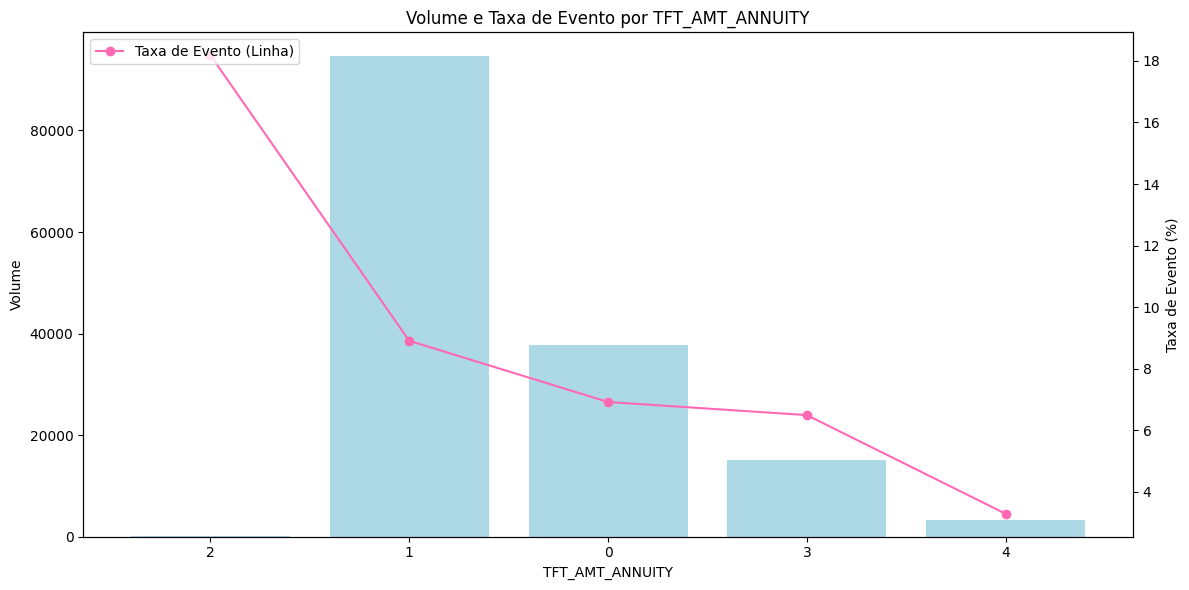

In [ ]:
result = analyze_variable(abt_train_09, 'TFT_AMT_ANNUITY', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_09, n_categories=5, target='TARGET', numeric_var='DAYS_EMPLOYED')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
0,1,0.053641,31748,-inf,-3126.0
3,7,0.076334,26122,-3125.00000,-1786.0
4,8,0.092974,11315,-1785.00000,-1405.0
2,6,0.109019,54449,-1404.00000,0.0
1,4,0.053836,27045,63599.31629,inf


In [ ]:
abt_train_10 = apply_tree_bins(abt_train_09, result, numeric_var='DAYS_EMPLOYED')
abt_test_09 = apply_tree_bins(abt_test_08, result, numeric_var='DAYS_EMPLOYED')
abt_prod_08 = apply_tree_bins(abt_prod_07, result, numeric_var='DAYS_EMPLOYED')

In [ ]:
abt_train_10.TFT_DAYS_EMPLOYED.unique()

array([2, 3, 1, 4, 0])

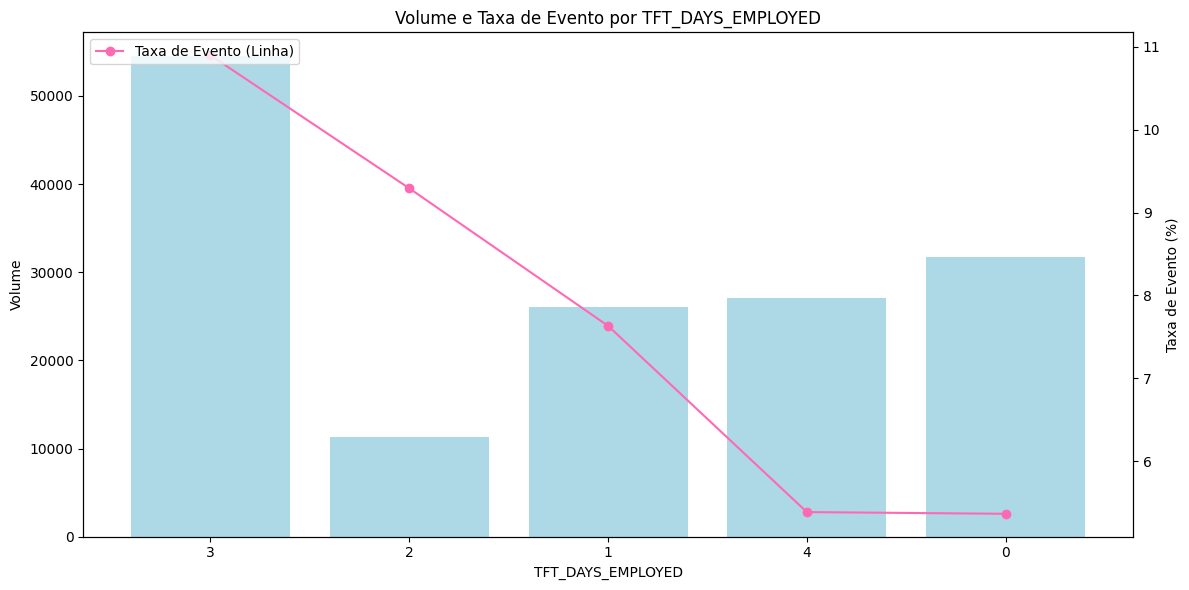

In [ ]:
result = analyze_variable(abt_train_10, 'TFT_DAYS_EMPLOYED', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_10, n_categories=5, target='TARGET', numeric_var='AMT_CREDIT')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
1,3,0.071988,39979,-inf,281853.0
3,7,0.099362,52666,281916.0,639963.0
4,8,0.199226,1034,640080.0,640080.0
2,6,0.078350,22157,640458.0,835506.0
0,2,0.059926,34843,835605.0,inf


In [ ]:
abt_train_11 = apply_tree_bins(abt_train_10, result, numeric_var='AMT_CREDIT')
abt_test_10 = apply_tree_bins(abt_test_09, result, numeric_var='AMT_CREDIT')
abt_prod_09 = apply_tree_bins(abt_prod_08, result, numeric_var='AMT_CREDIT')

In [ ]:
abt_train_11.TFT_AMT_CREDIT.unique()

array([3, 0, 1, 4, 2])

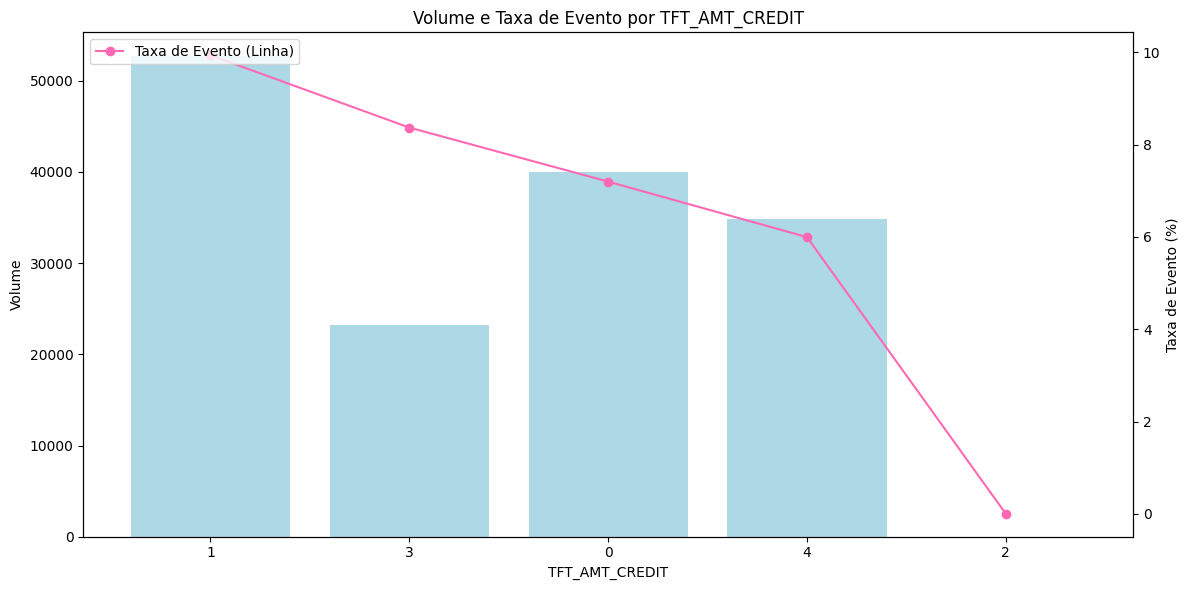

In [ ]:
result = analyze_variable(abt_train_11, 'TFT_AMT_CREDIT', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_11, n_categories=5, target='TARGET', numeric_var='EXT_SOURCE_3')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
2,5,0.246179,5431,-inf,0.145543
3,7,0.164192,8015,0.146442,0.240541
4,8,0.128064,10526,0.241861,0.328063
0,3,0.087092,61567,0.329655,0.511892
1,4,0.042647,65140,0.513694,inf


In [ ]:
abt_train_12 = apply_tree_bins(abt_train_11, result, numeric_var='EXT_SOURCE_3')
abt_test_11 = apply_tree_bins(abt_test_10, result, numeric_var='EXT_SOURCE_3')
abt_prod_10 = apply_tree_bins(abt_prod_09, result, numeric_var='EXT_SOURCE_3')

In [ ]:
abt_train_12.TFT_EXT_SOURCE_3.unique()

array([3, 2, 4, 1, 0])

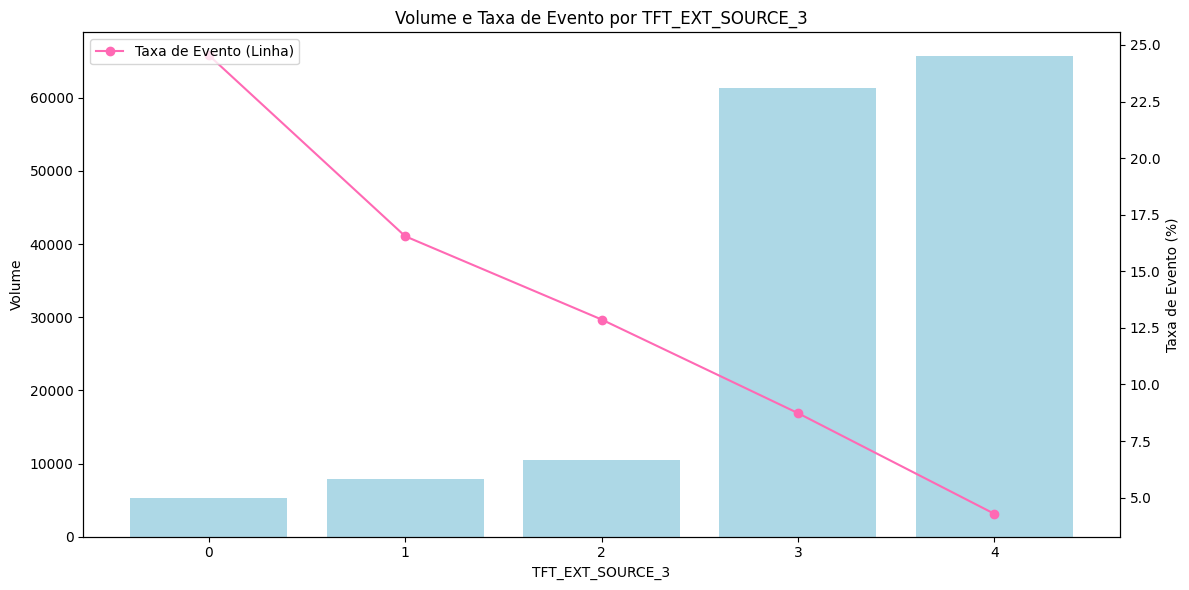

In [ ]:
result = analyze_variable(abt_train_12, 'TFT_EXT_SOURCE_3', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_12, n_categories=5, target='TARGET', numeric_var='AMT_GOODS_PRICE')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
1,3,0.079316,48918,-inf,274500.0
3,7,0.100042,14394,274810.5,418473.0
4,8,0.139483,14016,418500.0,450000.0
2,6,0.078570,33855,453321.0,676278.0
0,2,0.055854,39496,679500.0,inf


In [ ]:
abt_train_13 = apply_tree_bins(abt_train_12, result, numeric_var='AMT_GOODS_PRICE')
abt_test_12 = apply_tree_bins(abt_test_11, result, numeric_var='AMT_GOODS_PRICE')
abt_prod_11 = apply_tree_bins(abt_prod_10, result, numeric_var='AMT_GOODS_PRICE')

In [ ]:
abt_train_13.TFT_AMT_GOODS_PRICE.unique()

array([3, 0, 4, 1, 2])

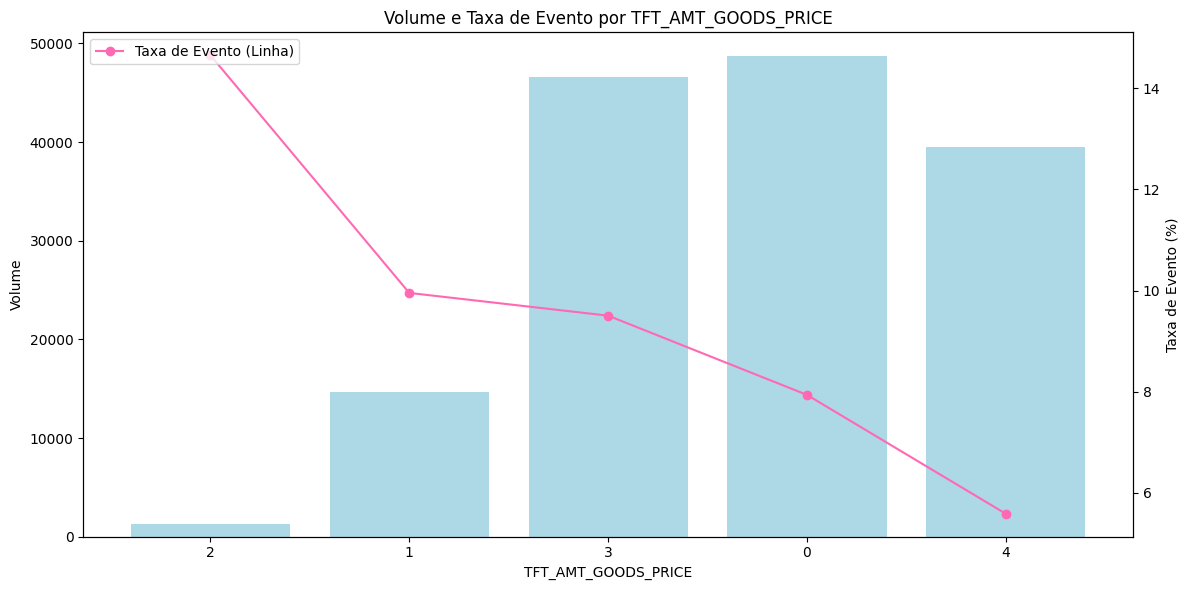

In [ ]:
result = analyze_variable(abt_train_13, 'TFT_AMT_GOODS_PRICE', "TARGET")

In [ ]:
result = categorize_with_decision_tree(abt_train_12, n_categories=5, target='TARGET', numeric_var='OWN_CAR_AGE')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
2,5,0.062923,6500,-inf,2.0
3,7,0.046519,3160,3.0,3.0
4,8,0.055876,11257,4.0,7.0
1,4,0.070330,9882,8.0,11.0
0,2,0.085594,119880,12.0,inf


In [ ]:
abt_train_14 = apply_tree_bins(abt_train_13, result, numeric_var='OWN_CAR_AGE')
abt_test_13 = apply_tree_bins(abt_test_12, result, numeric_var='OWN_CAR_AGE')
abt_prod_12 = apply_tree_bins(abt_prod_11, result, numeric_var='OWN_CAR_AGE')

In [ ]:
abt_train_14.TFT_OWN_CAR_AGE.unique()

array([4, 3, 2, 1, 0])

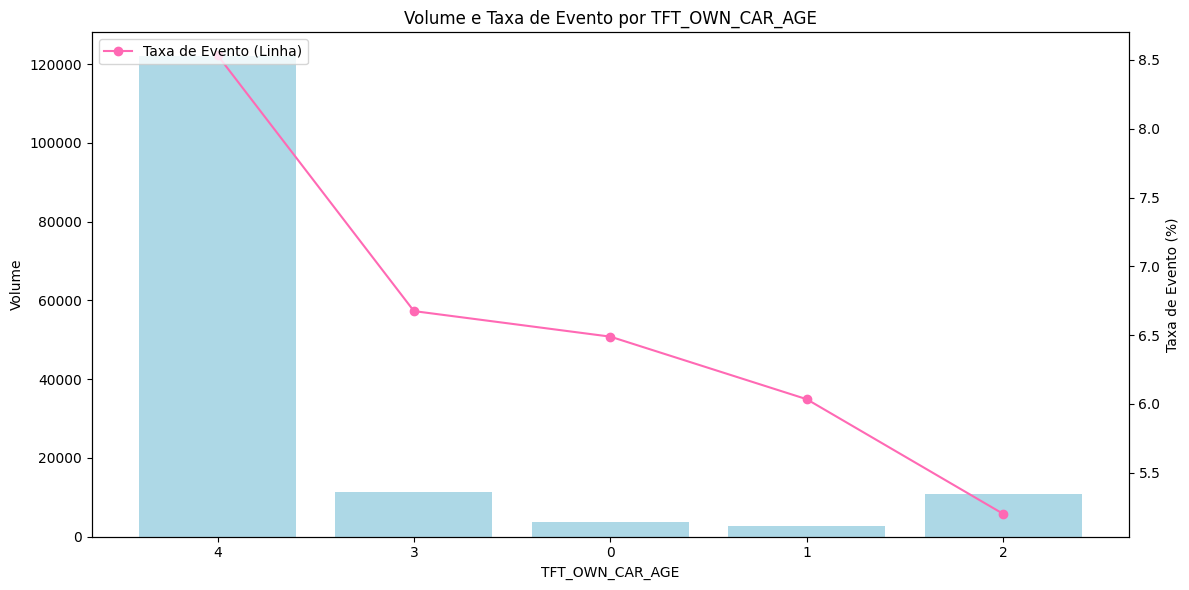

In [ ]:
result = analyze_variable(abt_train_14, 'TFT_OWN_CAR_AGE', "TARGET")

In [ ]:
abt_train_14.head()

,FLAG_DOCUMENT_3,OCCUPATION_TYPE,ORGANIZATION_TYPE,TARGET,SK_ID_CURR,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_M,...,TFT_Max_AMT_PAYMENT,TFT_EXT_SOURCE_1,TFT_Min_Percentual_pago,TFT_DAYS_BIRTH,TFT_AMT_ANNUITY,TFT_DAYS_EMPLOYED,TFT_AMT_CREDIT,TFT_EXT_SOURCE_3,TFT_AMT_GOODS_PRICE,TFT_OWN_CAR_AGE
45499,1,15,5,0,102669,0.0,0.0,0.0,1.0,0.0,...,3,3,4,2,1,2,3,3,3,4
74186,1,8,4,1,202196,1.0,0.0,0.0,0.0,0.0,...,4,3,3,2,1,3,3,2,3,4
65253,1,15,42,0,272854,1.0,0.0,0.0,0.0,0.0,...,4,3,3,3,0,3,0,4,0,4
60400,1,3,39,0,207628,1.0,0.0,0.0,0.0,0.0,...,3,3,4,3,1,3,3,3,3,4
71140,1,3,42,1,244369,0.0,0.0,0.0,1.0,0.0,...,4,2,3,1,1,1,1,4,3,4


In [ ]:
abt_test_13.head()

,FLAG_DOCUMENT_3,OCCUPATION_TYPE,ORGANIZATION_TYPE,SK_ID_CURR,TARGET,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_M,...,TFT_Max_AMT_PAYMENT,TFT_EXT_SOURCE_1,TFT_Min_Percentual_pago,TFT_DAYS_BIRTH,TFT_AMT_ANNUITY,TFT_DAYS_EMPLOYED,TFT_AMT_CREDIT,TFT_EXT_SOURCE_3,TFT_AMT_GOODS_PRICE,TFT_OWN_CAR_AGE
196348,0,8,5,243431,0,0.0,0.0,0.0,1.0,1.0,...,3,2,4,3,0,3,0,4,0,4
147976,1,8,5,127962,0,0.0,0.0,0.0,1.0,0.0,...,4,4,3,0,1,0,3,3,3,4
52662,1,8,7,244667,1,0.0,0.0,0.0,1.0,1.0,...,4,3,4,2,1,3,1,2,3,4
101577,1,8,5,220032,0,0.0,0.0,0.0,1.0,0.0,...,4,3,3,3,1,3,3,4,4,4
173078,1,3,39,123746,0,1.0,0.0,0.0,0.0,0.0,...,4,4,3,1,1,0,3,3,3,4


In [ ]:
abt_prod_12.shape

(92254, 22)

In [ ]:
metadados = pod.pod_academy_generate_metadata(abt_train_14,
                                          ids=['SK_ID_CURR'],
                                          targets=['TARGET'],
                                          orderby = 'CARDINALIDADE')

metadados

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,SK_ID_CURR,ID,0,0.0,150679,int64
1,ORGANIZATION_TYPE,Explicativa,0,0.0,58,object
2,OCCUPATION_TYPE,Explicativa,0,0.0,19,object
3,TFT_EXT_SOURCE_2,Explicativa,0,0.0,5,object
4,TFT_Max_AMT_PAYMENT,Explicativa,0,0.0,5,object
5,TFT_AMT_GOODS_PRICE,Explicativa,0,0.0,5,object
6,TFT_EXT_SOURCE_3,Explicativa,0,0.0,5,object
7,TFT_AMT_CREDIT,Explicativa,0,0.0,5,object
8,TFT_DAYS_EMPLOYED,Explicativa,0,0.0,5,object
9,TFT_AMT_ANNUITY,Explicativa,0,0.0,5,object


#5.0 Salvamento das Tabelas após tratamento para variáveis categóricas e numéricas

In [ ]:
#Salvando as tabelas pós-transformação
abt_train_14.to_csv('.../abt_categ_vars_treino.csv')
abt_test_13.to_csv('.../abt_categ_vars_test.csv')
abt_prod_12.to_csv('.../abt_categ_vars_prod.csv')

#6.0 Carregamento dos conjuntos de Treino, Teste e Validação após tratamento


In [ ]:
# Carregar o conjunto de treino após a etapa de preparação

abt_train_00 = pd.read_csv('/content/drive/MyDrive/Hackathon 4.0 - RL/abt_categ_vars_treino.csv')
abt_train_00.drop(axis=1,columns=['Unnamed: 0','ORGANIZATION_TYPE','OCCUPATION_TYPE', 'CODE_GENDER_M', 'CODE_GENDER_XNA', 'FLAG_DOCUMENT_3', 'TFT_EXT_SOURCE_1'],inplace=True)
abt_train_00.shape

(150679, 17)

In [ ]:
# Carregar o conjunto de produção após a etapa de preparação

abt_prod_00 = pd.read_csv('/content/drive/MyDrive/Hackathon 4.0 - RL/abt_categ_vars_prod.csv')
abt_prod_00.drop(axis=1,columns=['Unnamed: 0','ORGANIZATION_TYPE','OCCUPATION_TYPE', 'CODE_GENDER_M', 'CODE_GENDER_XNA', 'FLAG_DOCUMENT_3', 'TFT_EXT_SOURCE_1'],inplace=True)
abt_prod_00.shape

(92254, 16)

In [ ]:
# Carregar o conjunto de teste após a etapa de preparação

abt_test_00 = pd.read_csv('/content/drive/MyDrive/Hackathon 4.0 - RL/abt_categ_vars_test.csv')
abt_test_00.drop(axis=1,columns=['Unnamed: 0','ORGANIZATION_TYPE','OCCUPATION_TYPE', 'CODE_GENDER_M', 'CODE_GENDER_XNA', 'FLAG_DOCUMENT_3', 'TFT_EXT_SOURCE_1',],inplace=True)
abt_test_00.shape

(64578, 17)

#7.0 - Tratamento da Tabela após dummyficar as variáveis numéricas utilizando o OneHotEncoder

Importante ressaltar que nesta etapa algumas variáveis foram excluídas, buscando a otimização do osso modelo.

In [ ]:
import pickle
from sklearn.preprocessing import OneHotEncoder

#Aplicando One-Hot após categorização das variaveis

X = abt_train_00.drop(axis=1,columns=['TARGET','SK_ID_CURR', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Higher education'])

lista_onehot = list(X.columns)
print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(abt_train_00[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=abt_train_00.index)

df_train_03 = pd.concat([abt_train_00.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}

with open('/content/drive/MyDrive/Hackathon 4.0 - RL/Dataprep/prd_onehotenc_dummy.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

Lista de vars para OneHot Encoding:  ['TFT_EXT_SOURCE_2', 'TFT_Soma_AMT_INSTALMENT', 'TFT_Max_AMT_PAYMENT', 'TFT_Min_Percentual_pago', 'TFT_DAYS_BIRTH', 'TFT_AMT_ANNUITY', 'TFT_DAYS_EMPLOYED', 'TFT_AMT_CREDIT', 'TFT_EXT_SOURCE_3', 'TFT_AMT_GOODS_PRICE', 'TFT_OWN_CAR_AGE']


In [ ]:
# Carregar o encoder e a lista de colunas
with open('/content/drive/MyDrive/Hackathon 4.0 - RL/Dataprep/prd_onehotenc_dummy.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']

# Aplicando Encoder na base de teste
encoded_data_test = loaded_encoder.transform(abt_test_00[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=abt_test_00.index)

abt_test_00 = pd.concat([abt_test_00.drop(loaded_columns, axis=1), encoded_df_test], axis=1)

# Aplicando Encoder na base de produção
encoded_data_test = loaded_encoder.transform(abt_prod_00[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=abt_prod_00.index)

abt_prod_00 = pd.concat([abt_prod_00.drop(loaded_columns, axis=1), encoded_df_test], axis=1)

In [ ]:
#Separando o Target e o ID para treinamento do modelo

X = df_train_03.drop(axis=1,columns=['TARGET','SK_ID_CURR'])

lista_features_rl = list(X.columns)
lista_features_rl

['NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'TFT_EXT_SOURCE_2_1',
 'TFT_EXT_SOURCE_2_2',
 'TFT_EXT_SOURCE_2_3',
 'TFT_EXT_SOURCE_2_4',
 'TFT_Soma_AMT_INSTALMENT_1',
 'TFT_Soma_AMT_INSTALMENT_2',
 'TFT_Soma_AMT_INSTALMENT_3',
 'TFT_Soma_AMT_INSTALMENT_4',
 'TFT_Max_AMT_PAYMENT_1',
 'TFT_Max_AMT_PAYMENT_2',
 'TFT_Max_AMT_PAYMENT_3',
 'TFT_Max_AMT_PAYMENT_4',
 'TFT_Min_Percentual_pago_1',
 'TFT_Min_Percentual_pago_2',
 'TFT_Min_Percentual_pago_3',
 'TFT_Min_Percentual_pago_4',
 'TFT_DAYS_BIRTH_1',
 'TFT_DAYS_BIRTH_2',
 'TFT_DAYS_BIRTH_3',
 'TFT_DAYS_BIRTH_4',
 'TFT_AMT_ANNUITY_1',
 'TFT_AMT_ANNUITY_2',
 'TFT_AMT_ANNUITY_3',
 'TFT_AMT_ANNUITY_4',
 'TFT_DAYS_EMPLOYED_1',
 'TFT_DAYS_EMPLOYED_2',
 'TFT_DAYS_EMPLOYED_3',
 'TFT_DAYS_EMPLOYED_4',
 'TFT_AMT_CREDIT_1',
 'TFT_AMT_CREDIT_2',
 'TFT_AMT_CREDIT_3',
 'TFT_AMT_CREDIT_4',
 'TFT_EXT_SOURCE_3_1',
 'TFT_EXT_SO

#8.0 Treinamento do Modelo de Regressão Logística, utilizando biblioteca StatsModels

In [ ]:
#Importanto bibliote para treinamento do modelo
import statsmodels.api as sm

In [ ]:
def logistic_regression_with_scorecard(data, target_var, features):
    # Adicionando uma constante ao dataset (intercepto)
    data = sm.add_constant(data)

    # Ajustando o modelo de regressão logística
    model = sm.Logit(data[target_var], data[features + ['const']]).fit(maxiter=100, method='bfgs')
    # model = sm.Logit(data[target_var], data[features]).fit()

    # Coletando p-valores e estatísticas de Wald
    summary = model.summary2().tables[1]
    summary['Wald'] = summary['z']**2
    scorecard = summary[['Coef.', 'P>|z|', 'Wald']]
    scorecard.columns = ['Beta Coefficient', 'P-Value', 'Wald Statistic']
    scorecard = scorecard.sort_values(by='Wald Statistic', ascending=False)

    return model, scorecard

model, scorecard = logistic_regression_with_scorecard(df_train_03, 'TARGET', lista_features_rl)
scorecard

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.251828
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101


,Beta Coefficient,P-Value,Wald Statistic
TFT_EXT_SOURCE_3_4,-1.748319,0.000000e+00,2.051078e+03
TFT_EXT_SOURCE_3_3,-1.144683,9.283397e-222,1.010520e+03
TFT_EXT_SOURCE_3_2,-0.735131,1.229117e-61,2.744293e+02
TFT_DAYS_EMPLOYED_3,0.431798,9.744132e-46,2.015172e+02
TFT_EXT_SOURCE_2_4,-1.524753,1.349741e-44,1.962864e+02
TFT_Soma_AMT_INSTALMENT_4,-0.690878,3.363023e-33,1.441091e+02
TFT_AMT_GOODS_PRICE_4,-0.797373,9.710391e-31,1.328582e+02
TFT_Soma_AMT_INSTALMENT_2,-0.543121,7.968095e-30,1.286801e+02
TFT_EXT_SOURCE_3_1,-0.506222,5.168093e-29,1.249696e+02
TFT_EXT_SOURCE_2_3,-1.070548,1.359235e-23,1.002266e+02


In [ ]:
# Adiciona uma coluna chamada 'const' com valor 1.0 ao conjunto de treino
df_train_03['const'] = 1.0
# Adiciona uma coluna chamada 'const' com valor 1.0 ao conjunto de teste
abt_test_00['const'] = 1.0
# Cria um novo conjunto de treino removendo as colunas 'TARGET' e 'SK_ID_CURR'
df_train_04 = df_train_03.drop(axis=1,columns=['TARGET','SK_ID_CURR'])
# Cria um novo conjunto de teste removendo as colunas 'TARGET' e 'SK_ID_CURR'
abt_test_04 = abt_test_00.drop(axis=1,columns=['TARGET','SK_ID_CURR'])

In [ ]:
# Calcula e atribui os escores (probabilidades) da classe 1 ao conjunto de treino e teste
df_train_04['Score_1'] = model.predict(df_train_04).round(4)
abt_test_04['Score_1'] = model.predict(abt_test_04).round(4)

# Calcula e atribui os escores (probabilidades) da classe 0 ao conjunto de teste
df_train_04['Score_0'] = 1 - df_train_04['Score_1']
abt_test_04['Score_0'] = 1 - abt_test_04['Score_1']

#9.0 Verificando Histograma e Ordenação da Regressão Logística Treinada

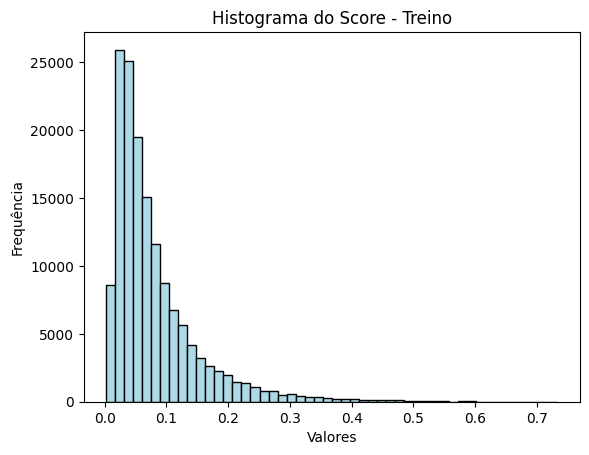

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Plotando o histograma
plt.hist(df_train_04.Score_1, color='lightblue', bins=50, edgecolor='black')
plt.title("Histograma do Score - Treino")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

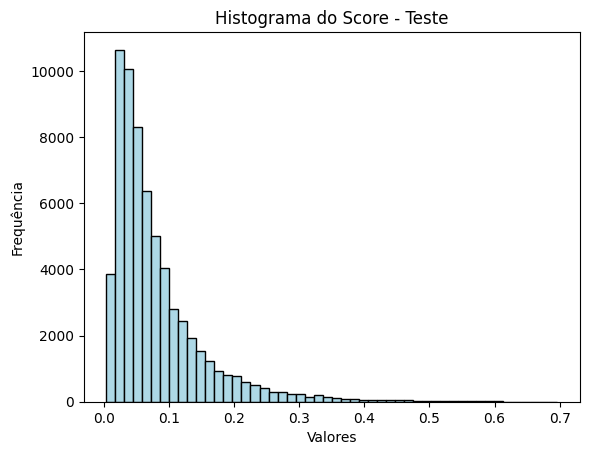

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Plotando o histograma
plt.hist(abt_test_04.Score_1, color='lightblue', bins=50, edgecolor='black')
plt.title("Histograma do Score - Teste")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

In [ ]:
#### Trazer o id e target para a tabela pós dataprep

abt_train_t02 = df_train_04.merge(df_train_03[['TARGET','SK_ID_CURR']], left_index=True, right_index=True, how='inner')
abt_teste_t02 = abt_test_04.merge(abt_test_00[['TARGET','SK_ID_CURR']], left_index=True, right_index=True, how='inner')

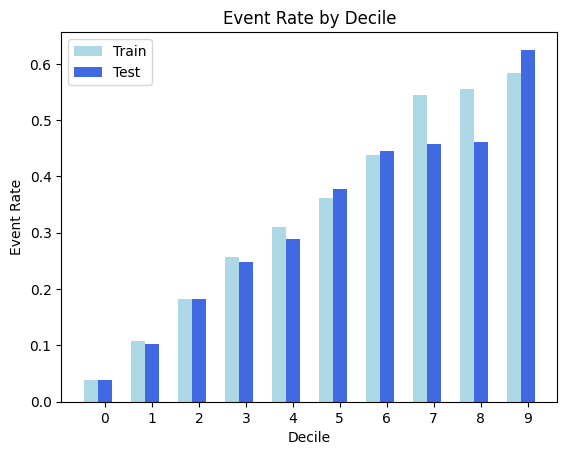

,Metric,Train Value,Test Value
0,KS,0.355607,0.352916
1,AUC,0.736983,0.736254
2,Gini,0.473965,0.472508


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import pandas as pd
import numpy as np

def calculate_metrics(train_df, test_df, score_column, target_column,bins=10):
    def compute_metrics(df, score_column, target_column):
        df_sorted = df.sort_values(by=score_column, ascending=False)

        # Calcular KS
        df_sorted['cum_good'] = (1 - df_sorted[target_column]).cumsum() / (1 - df_sorted[target_column]).sum()
        df_sorted['cum_bad'] = df_sorted[target_column].cumsum() / df_sorted[target_column].sum()
        df_sorted['ks'] = np.abs(df_sorted['cum_good'] - df_sorted['cum_bad'])
        ks_statistic = df_sorted['ks'].max()

        # Calcular AUC
        auc_value = roc_auc_score(df_sorted[target_column], df_sorted[score_column])

        # Calcular Gini
        gini = 2 * auc_value - 1

        # Dividir o score em 10 faixas
        df_sorted['decile'] = pd.cut(df_sorted[score_column], bins, labels=False)

        # Criar tabela detalhada
        table = df_sorted.groupby('decile').agg(
            min_score=pd.NamedAgg(column=score_column, aggfunc='min'),
            max_score=pd.NamedAgg(column=score_column, aggfunc='max'),
            event_rate=pd.NamedAgg(column=target_column, aggfunc='mean'),
            volume=pd.NamedAgg(column=target_column, aggfunc='size')
        ).reset_index()

        return ks_statistic, auc_value, gini, table

    ks_train, auc_train, gini_train, table_train = compute_metrics(train_df, score_column, target_column)
    ks_test, auc_test, gini_test, table_test = compute_metrics(test_df, score_column, target_column)

    # Plotando o gráfico de barras para Event Rate por Decil
    barWidth = 0.3
    r1 = np.arange(len(table_train))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, table_train['event_rate'], color='lightblue', width=barWidth, label='Train')
    plt.bar(r2, table_test['event_rate'], color='royalblue', width=barWidth, label='Test')

    plt.xlabel('Decile')
    plt.ylabel('Event Rate')
    plt.title('Event Rate by Decile')
    plt.xticks([r + barWidth for r in range(len(table_train))], table_train['decile'])
    plt.legend()
    plt.show()

    # Criando DataFrame para as métricas
    metrics_df = pd.DataFrame({
        'Metric': ['KS', 'AUC', 'Gini'],
        'Train Value': [ks_train, auc_train, gini_train],
        'Test Value': [ks_test, auc_test, gini_test]
    })

    return metrics_df, table_train, table_test

metrics, ord_score_train,vord_score_test = calculate_metrics(abt_train_t02, abt_teste_t02, 'Score_1', 'TARGET',bins=10)
metrics

#10 - Aplicando o modelo na tabela de validação e salvando arquivo para validar no Kaggle

In [ ]:
#Adicionando variavel Constante a tabela de produção
abt_prod_00['const'] = 1.0


In [ ]:
# Cria um novo conjunto de produção removendo a coluna 'SK_ID_CURR' para validação

abt_prod_01 = abt_prod_00.drop(axis=1,columns=['SK_ID_CURR'])

In [ ]:
#Fazendo a Scoragem do modelo na base de prdução
abt_prod_01['Score_1'] = model.predict(abt_prod_01).round(4)


In [ ]:
#Trazendo os ID para a tabela para validação no Kaggle
abt_prod_02 = abt_prod_01.merge(abt_prod_00[['SK_ID_CURR']], left_index=True, right_index=True, how='inner')

In [ ]:
#Ajuste da Tabela para o envio do Kaggle
abt_envio_kaggle = abt_prod_02[['SK_ID_CURR','Score_1']]
abt_envio_kaggle.rename(columns={'Score_1':'TARGET'},inplace=True)
abt_envio_kaggle.rename(columns={'SK_ID_CURR':'ID'},inplace=True)
abt_envio_kaggle['TARGET'] = abt_envio_kaggle['TARGET'].round(1)
abt_envio_kaggle.head()

<ipython-input-109-d54970f48409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_envio_kaggle.rename(columns={'Score_1':'TARGET'},inplace=True)
<ipython-input-109-d54970f48409>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_envio_kaggle.rename(columns={'SK_ID_CURR':'ID'},inplace=True)
<ipython-input-109-d54970f48409>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt

,ID,TARGET
0,384575,0.4
1,214010,0.0
2,142232,0.2
3,389171,0.0
4,283617,0.1


In [ ]:
#Salvando Tabela para envio ao Kaggle
abt_envio_kaggle.to_csv('.../abt_rl_scored.csv', index=False)

In [ ]:
#Salvando artefato de Modelo
import pickle

# Salva o modelo ajustado usando pickle
with open('/content/drive/MyDrive/Hackathon 4.0 - RL/LR_Model.pkl', 'wb') as f:
    pickle.dump(model, f)